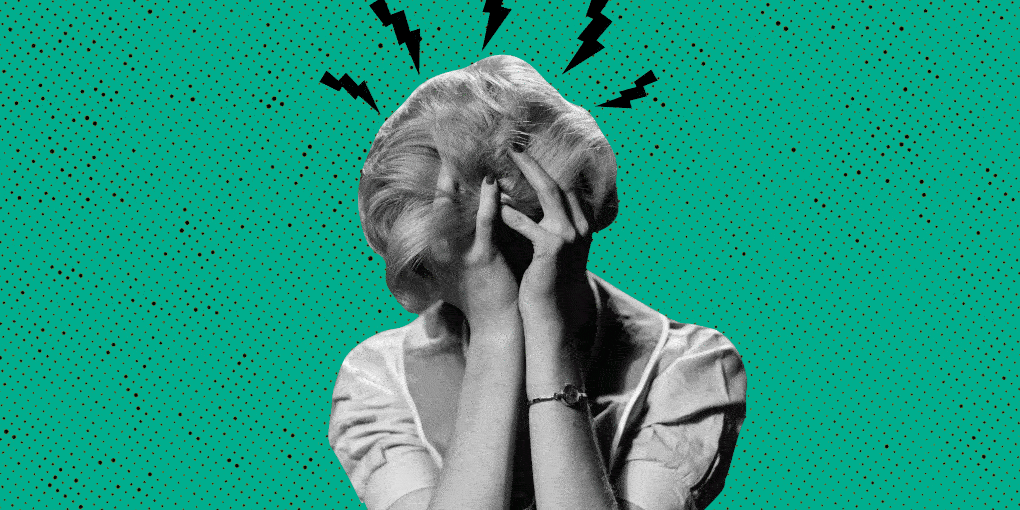

<div class='alert alert-info'>
    😊If you found this to be interesting💡 and helpful✨, Please Upvote🔺🔺 and leave a comment💬 💡

</div>

## **Notebook Contents**✨✨

1. [Setting up the view of the notebook🌌](#setup_view)

2. [Import Libraries⬇️](#import)

3. [Load the dataset📦](#load_dataset)

4. [Exploratory Data Analysis🚀](#eda)
    * [4.1 - Categorical Variables📊 VS Target🎯](#cat_vs_target)
    
    * [4.2 - Continuous Variables📈 VS Target🎯](#con_vs_target)
     
5. [Label Encoding Target Column🔢](#encode_target)

6. [Balancing the imbalance dataset⚖️ - Upsampling⬆️](#balance_imbalance)

7. [Train Test Split✂️](#tts)

8. [Model Creation✨ - Random Forest Classifier🌳](#mc)

9. [Hyper Parameter Optimization⚡](#hpo)

10. [Model Creation✨ & Model Training🏋️‍♂️](#mc_and_mt)

11. [Model Insights📈📉 Using SHAP🧠](#mi)
     * [11.1 - Impact💥 of features on model's output🥅](#impact)
     
     * [11.2 - Average impact💥 of features on model's output🥅](#avg_impact)

<a id='setup_view'></a>
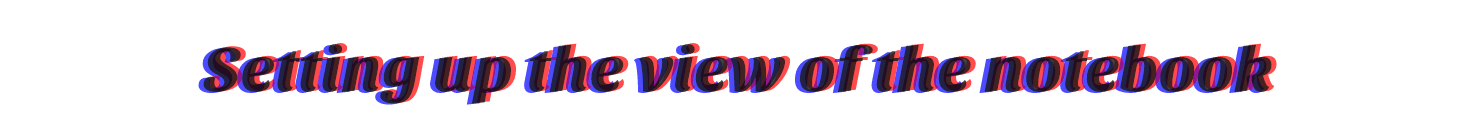

In [1]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map = ['#6166B3', '#e8eff6', '#0b2553']

prompt = color_map[-1]
main_color = color_map[0]

css_file = '''

    div #notebook {
    background-color: white;
    line-height: 20px;
    }

    #notebook-container {
    %s
    margin-top: 2em;
    padding-top: 2em;
    border-top: 4px solid %s; /* light orange */
    -webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    }

    div .input {
    margin-bottom: 1em;
    }

    .rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
    color: %s; /* light orange */
    font-weight: 600;
    }

    div.input_area {
    border: none;
        background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
        border-top: 2px solid %s; /* light orange */
    }

    div.input_prompt {
    color: %s; /* light blue */
    }

    div.output_prompt {
    color: %s; /* strong orange */
    }

    div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
    background: %s; /* light orange */
    }

    div.cell.selected, div.cell.selected.jupyter-soft-selected {
        border-color: %s; /* light orange */
    }

    .edit_mode div.cell.selected:before {
    background: %s; /* light orange */
    }

    .edit_mode div.cell.selected {
    border-color: %s; /* light orange */

    }
    '''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

<a id='import'></a>
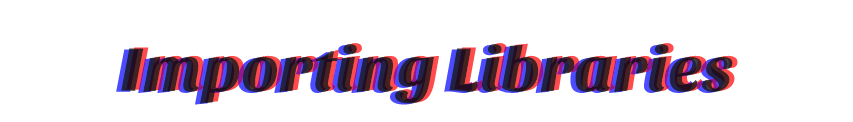

In [2]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For upsampling
from sklearn.utils import resample

# For encoding
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

# For splitting data
from sklearn.model_selection import train_test_split

# For modelling
from sklearn.ensemble import RandomForestClassifier

# For hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV

# For model interpretation
import shap

# For model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

<a id='load_data'></a>
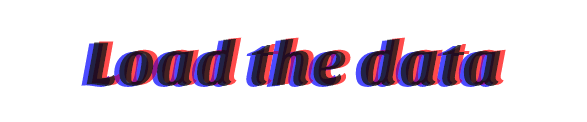

In [3]:
df = pd.read_csv("../input/migraine-classification/data.csv")

In [4]:
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


<a id='eda'></a>
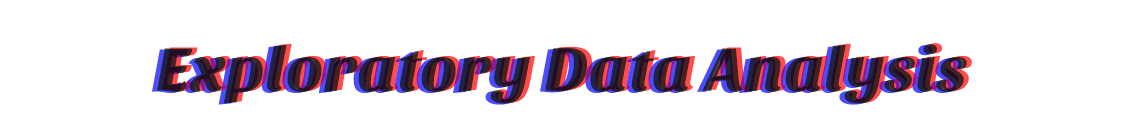

<a id='cat_vs_target'></a>
<div class='alert alert-block alert-success'>
    <h3>
    <strong>Relation Between Categorical Variables And Target</strong>
    </h3>
    
</div>

In [5]:
cat_col = []
con_col = []

for col in df.columns:
    if df[col].nunique() < 15:
        cat_col.append(col)
    else:
        con_col.append(col)

In [6]:
def count_percentage_plot(df, x, target, suptitle):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
    plt.suptitle(suptitle, fontsize=16)
    
    # Plot the count plot
    ax1.set_title(f"Number of {x.capitalize()} across Migraine Type")
    sns.countplot(data=df,x=target, hue=x, ax=ax1, palette="Set2")
    ax1.set_xlabel("")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    
    # Plot the percent plot
    ax2.set_title(f"Percentage of {x.capitalize()} across Migraine Type")
    sns.histplot(df, x=target, hue=x, stat="probability", multiple="fill", shrink=1,ax=ax2, palette='Set2')
    ax2.set_xlabel("")
    ax2.set_ylabel("Percentage")
    ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    
    
    # Annotating the plots
    for p1,p2 in zip(ax1.patches,ax2.patches):
        ax1.annotate("{:.1f}".format(p1.get_height()), (p1.get_x(),p1.get_height()))
        ax2.annotate("{:.2f}".format(p2.get_height()), (p2.get_x(),p2.get_height()))
        
    plt.tight_layout(pad=2)
    plt.show()

<div class='alert alert-info'>
    <h3>
    <strong>Duration And Type</strong>
    </h3>
    
</div>

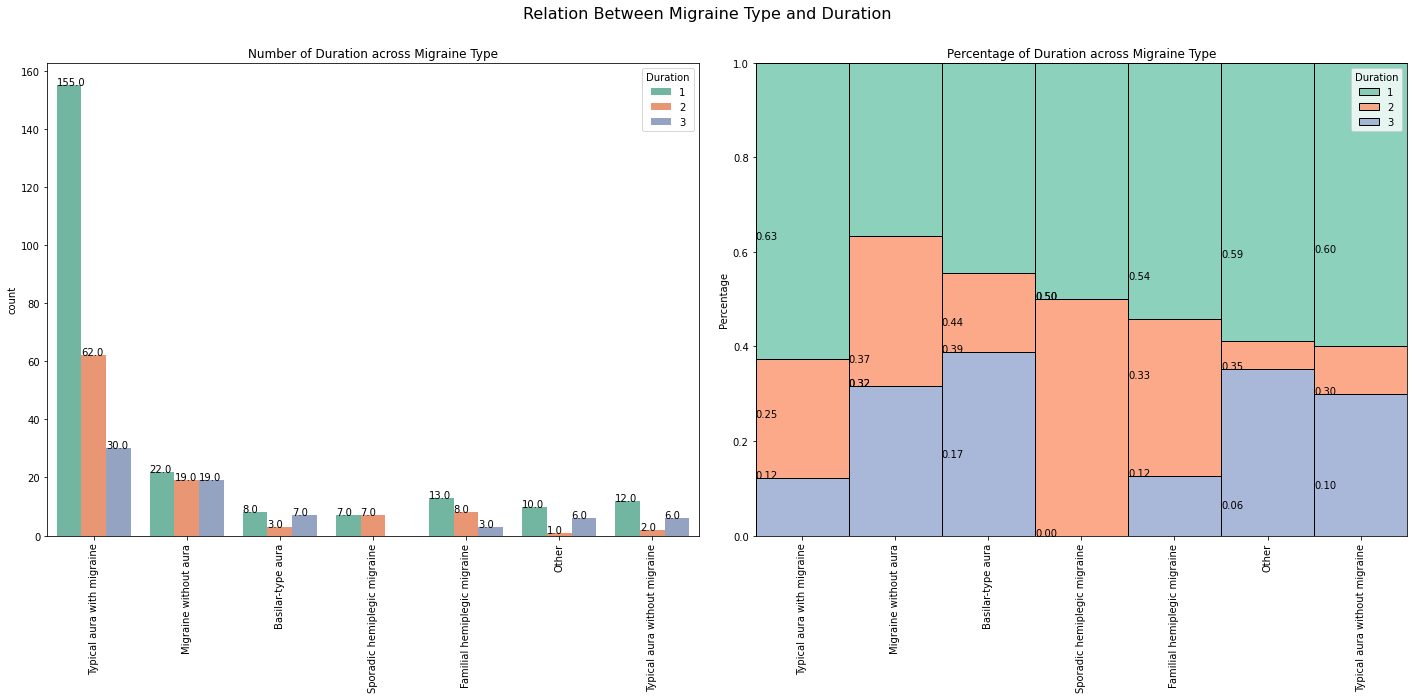

In [7]:
count_percentage_plot(df, 'Duration', 'Type', "Relation Between Migraine Type and Duration")

<div class='alert alert-info'>
    <h3>
    <strong>Frequency And Type</strong>
    </h3>
    
</div>

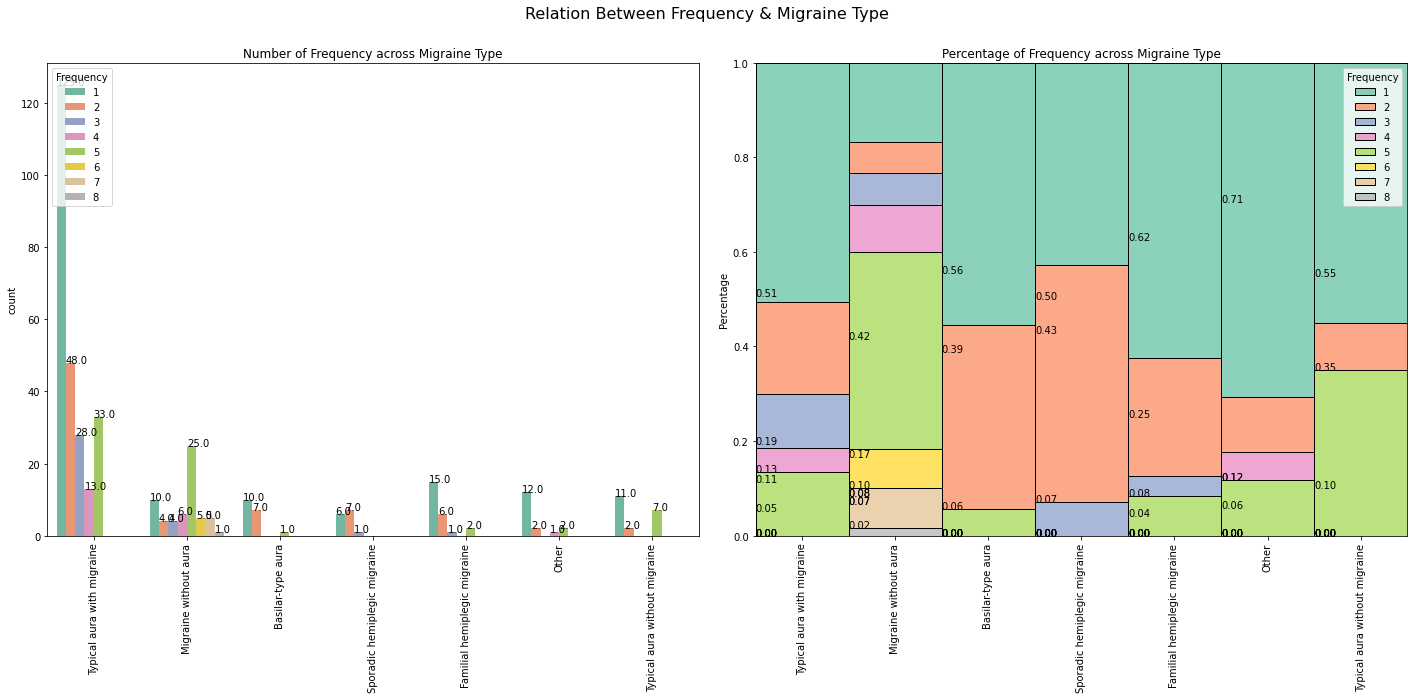

In [8]:
count_percentage_plot(df, 'Frequency', 'Type', "Relation Between Frequency & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Location And Type</strong>
    </h3>
    
</div>

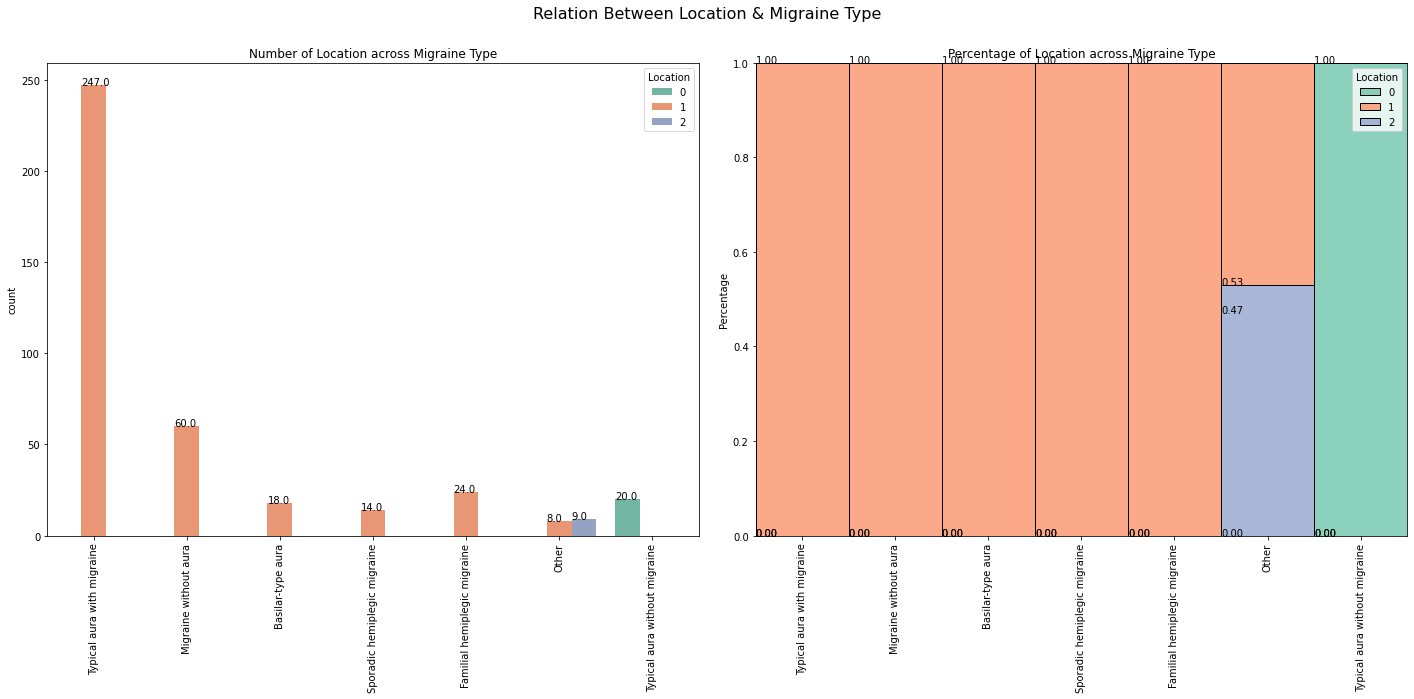

In [9]:
count_percentage_plot(df, 'Location', 'Type', "Relation Between Location & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Character And Type</strong>
    </h3>
    
</div>

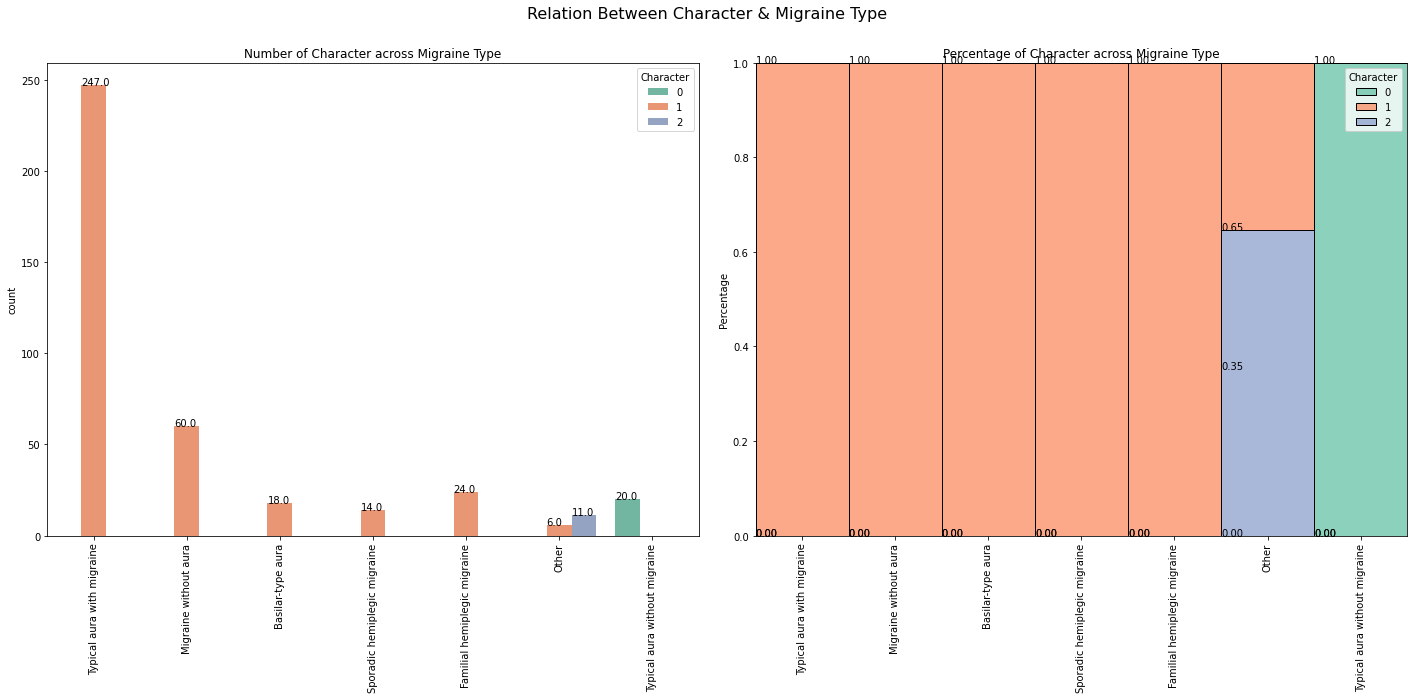

In [10]:
count_percentage_plot(df, 'Character', 'Type', "Relation Between Character & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Intensity And Type</strong>
    </h3>
    
</div>

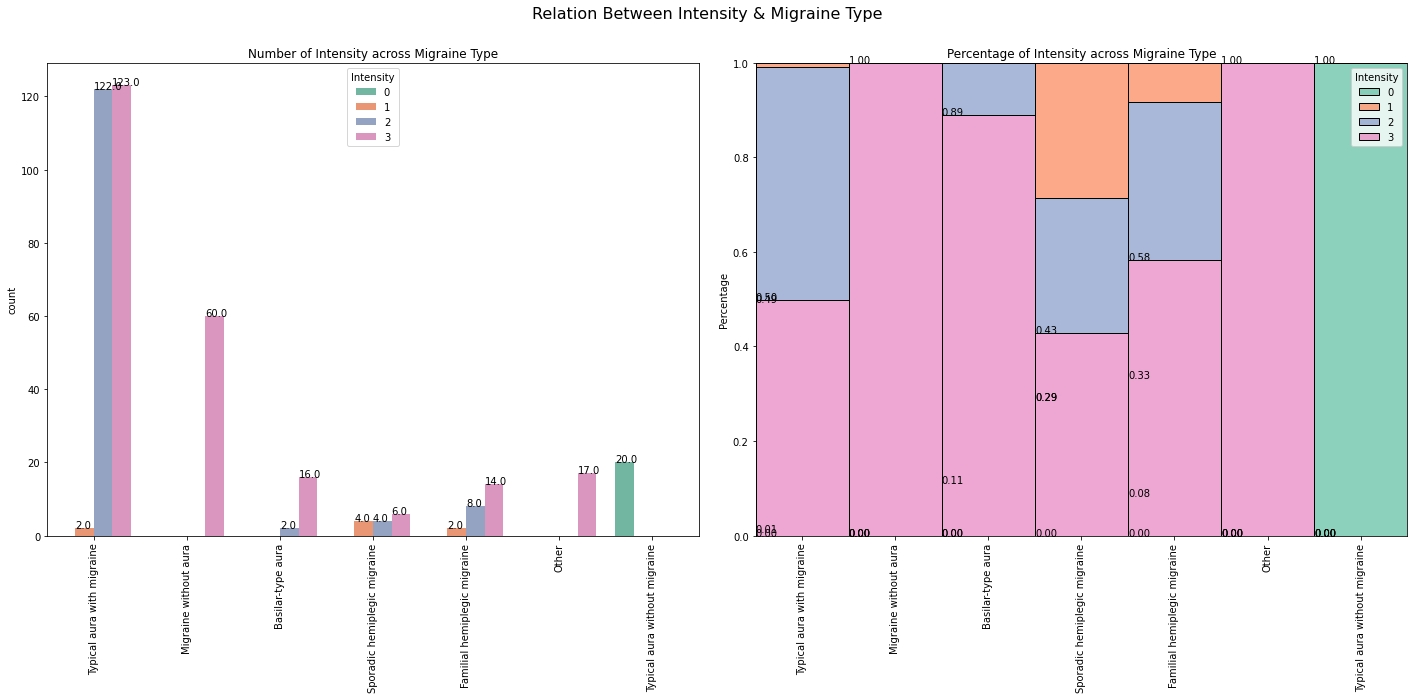

In [11]:
count_percentage_plot(df, 'Intensity', 'Type', "Relation Between Intensity & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Nausea And Type</strong>
    </h3>
    
</div>

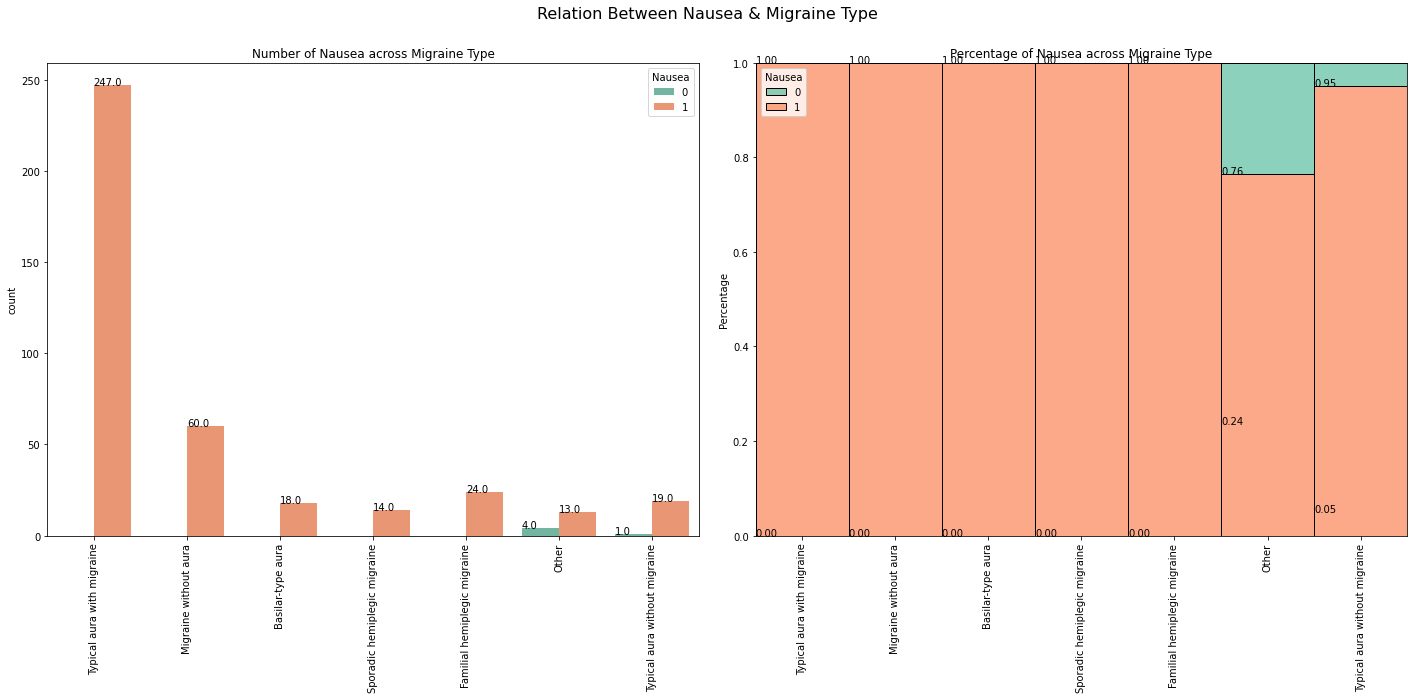

In [12]:
count_percentage_plot(df, 'Nausea', 'Type', "Relation Between Nausea & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Vomit And Type</strong>
    </h3>
    
</div>

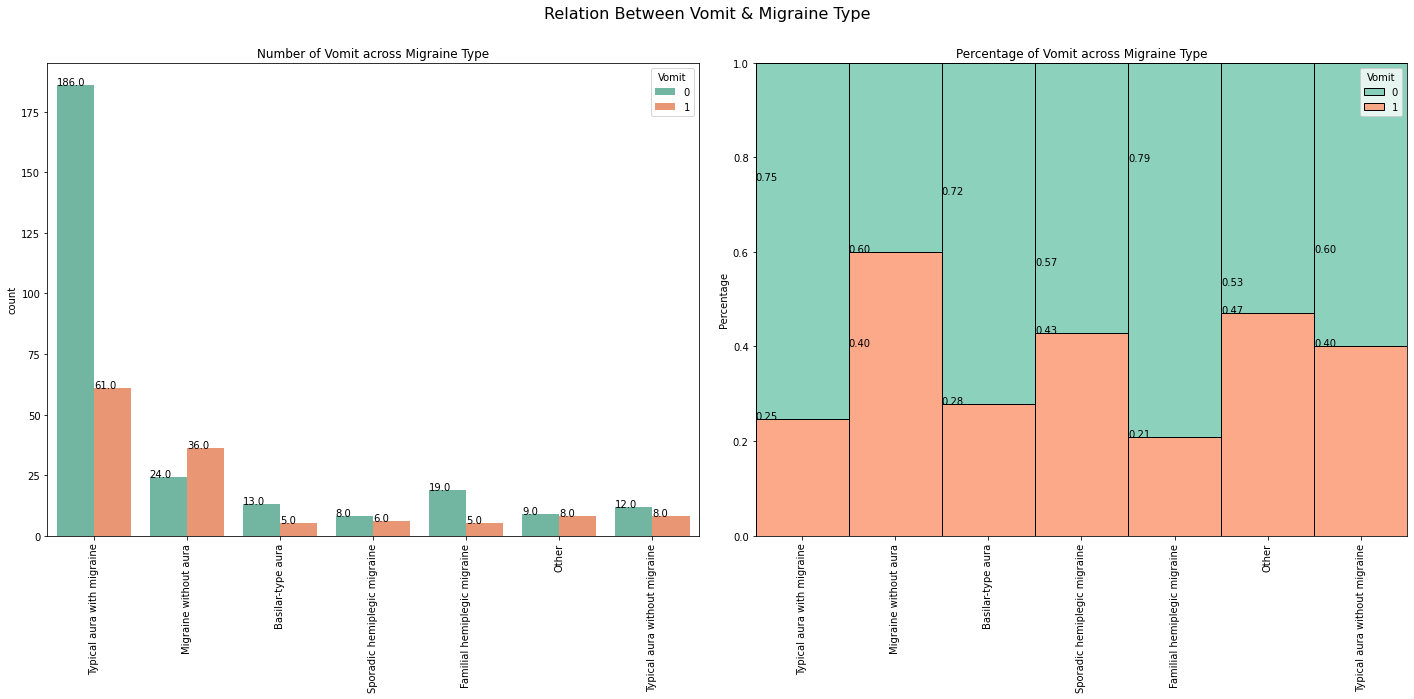

In [13]:
count_percentage_plot(df, 'Vomit', 'Type', "Relation Between Vomit & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Phonophobia And Type</strong>
    </h3>
    
</div>

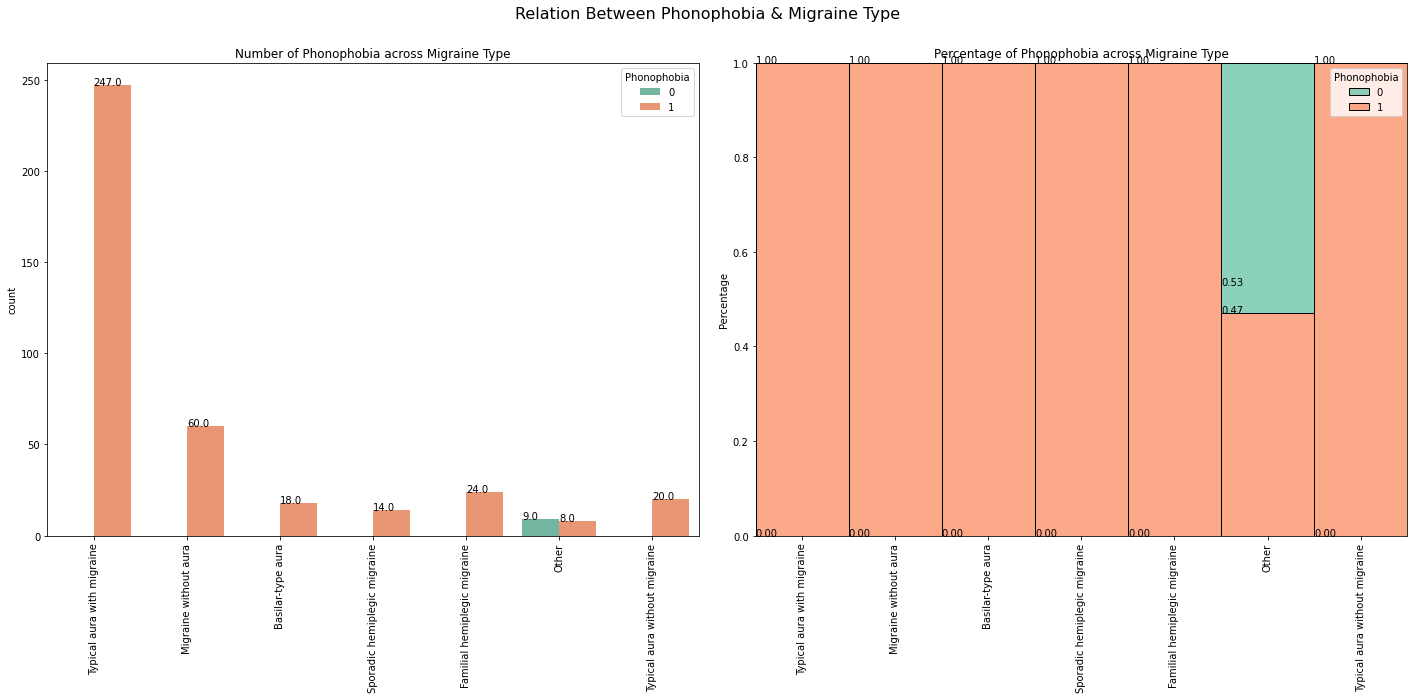

In [14]:
count_percentage_plot(df, 'Phonophobia', 'Type', "Relation Between Phonophobia & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Photophobia And Type</strong>
    </h3>
    
</div>

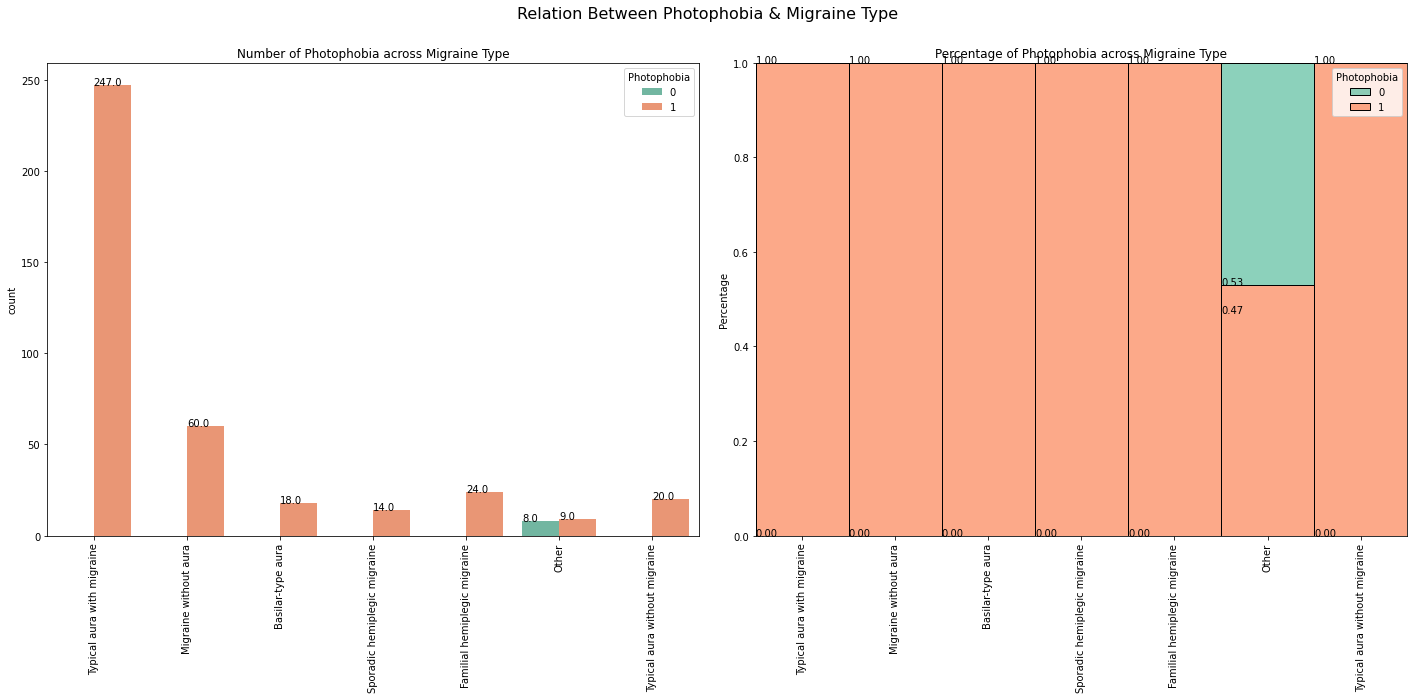

In [15]:
count_percentage_plot(df, 'Photophobia', 'Type', "Relation Between Photophobia & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Visual And Type</strong>
    </h3>
    
</div>

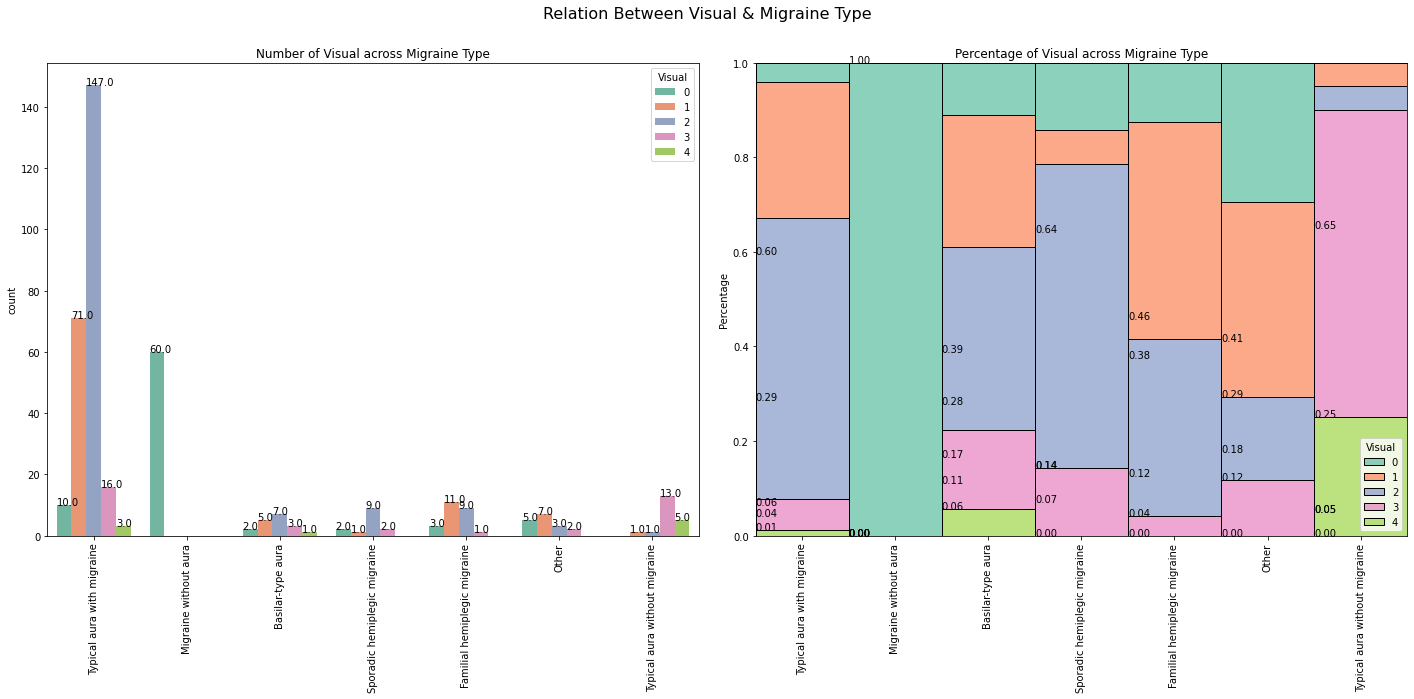

In [16]:
count_percentage_plot(df, 'Visual', 'Type', "Relation Between Visual & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Sensory And Type</strong>
    </h3>
    
</div>

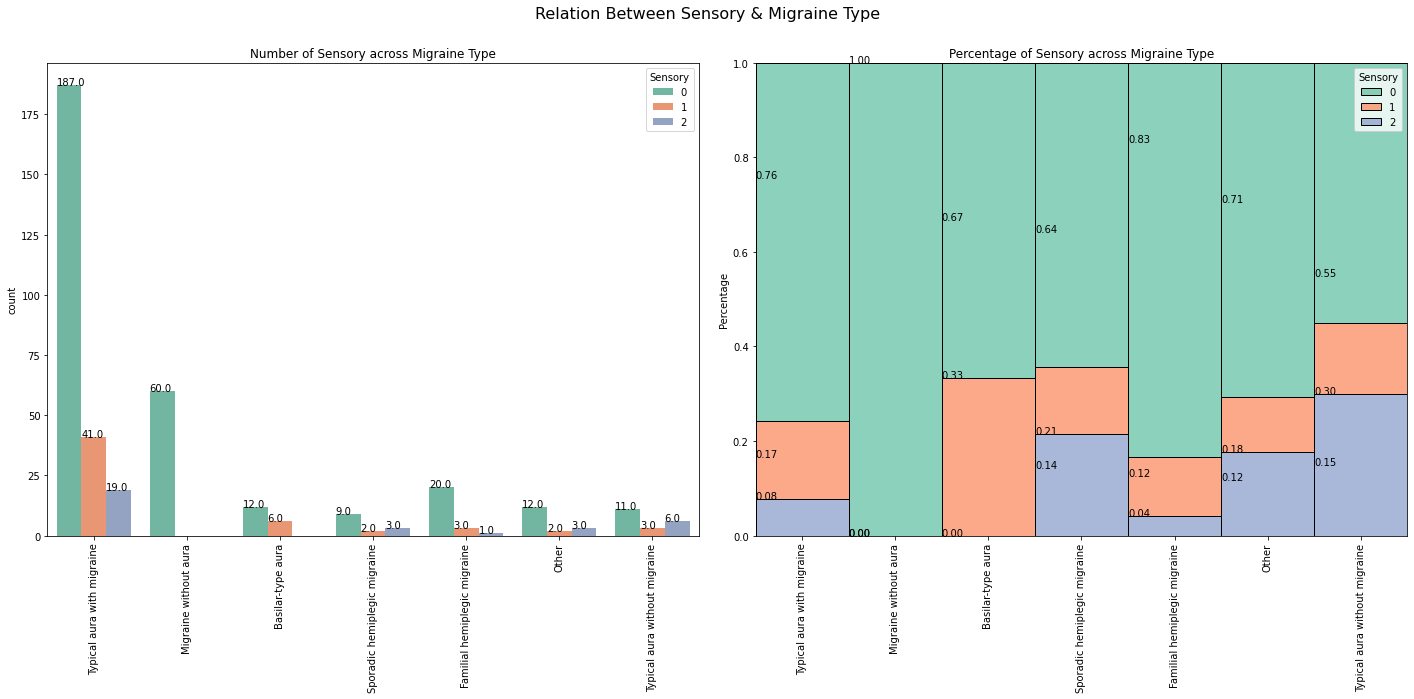

In [17]:
count_percentage_plot(df, 'Sensory', 'Type', "Relation Between Sensory & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Dysphasia And Type</strong>
    </h3>
    
</div>

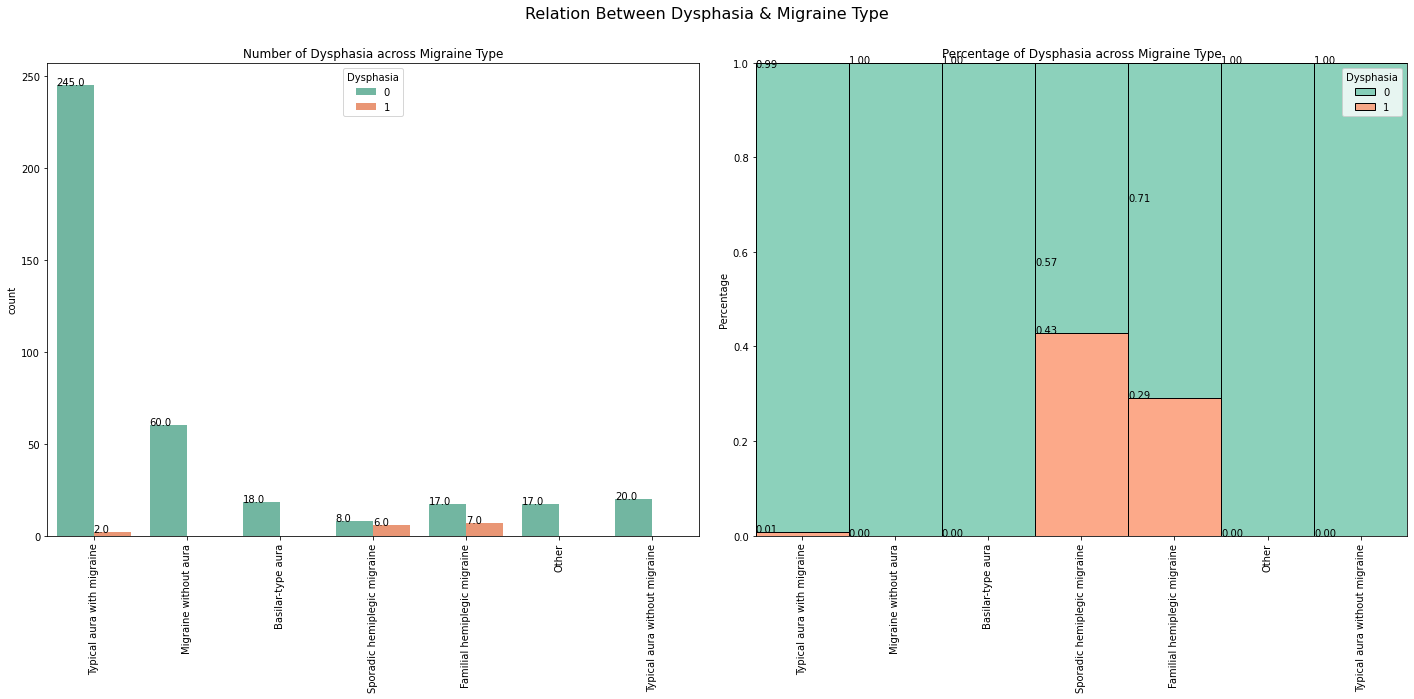

In [18]:
count_percentage_plot(df, 'Dysphasia', 'Type', "Relation Between Dysphasia & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Dysarthria And Type</strong>
    </h3>
    
</div>

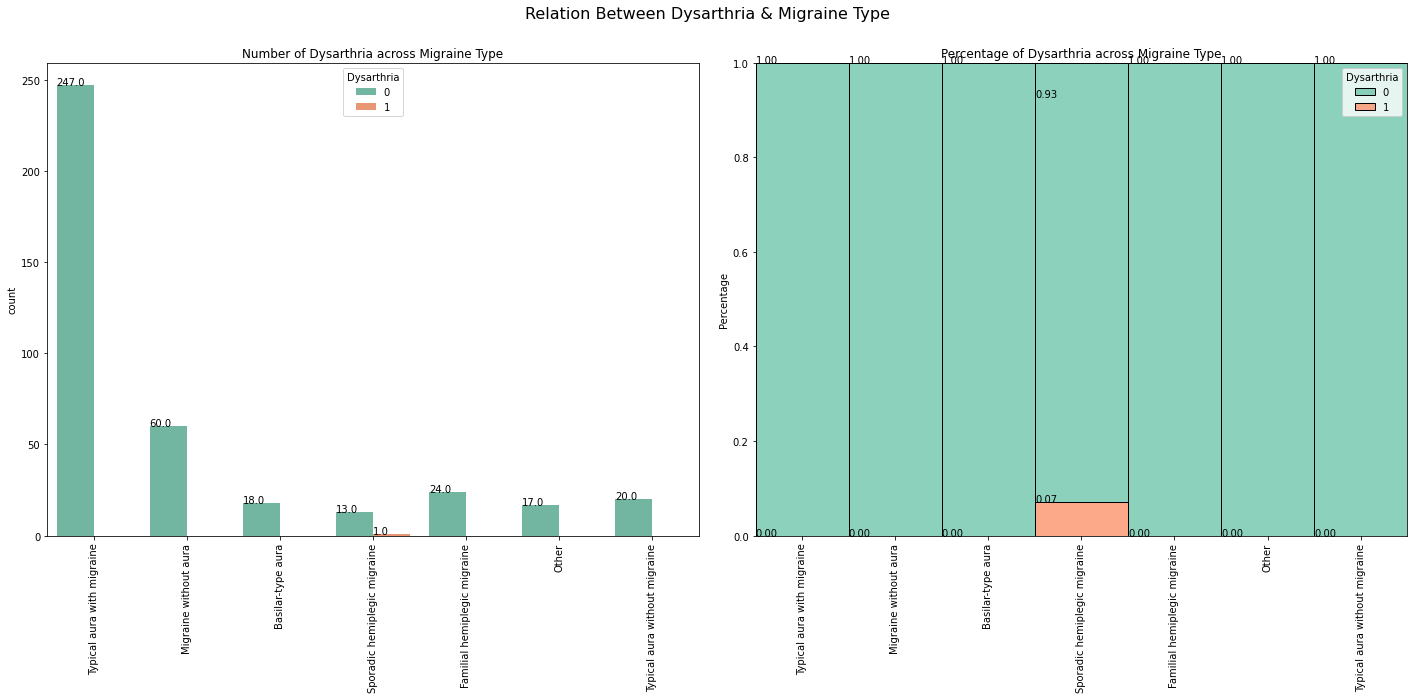

In [19]:
count_percentage_plot(df, 'Dysarthria', 'Type', "Relation Between Dysarthria & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Vertigo And Type</strong>
    </h3>
    
</div>

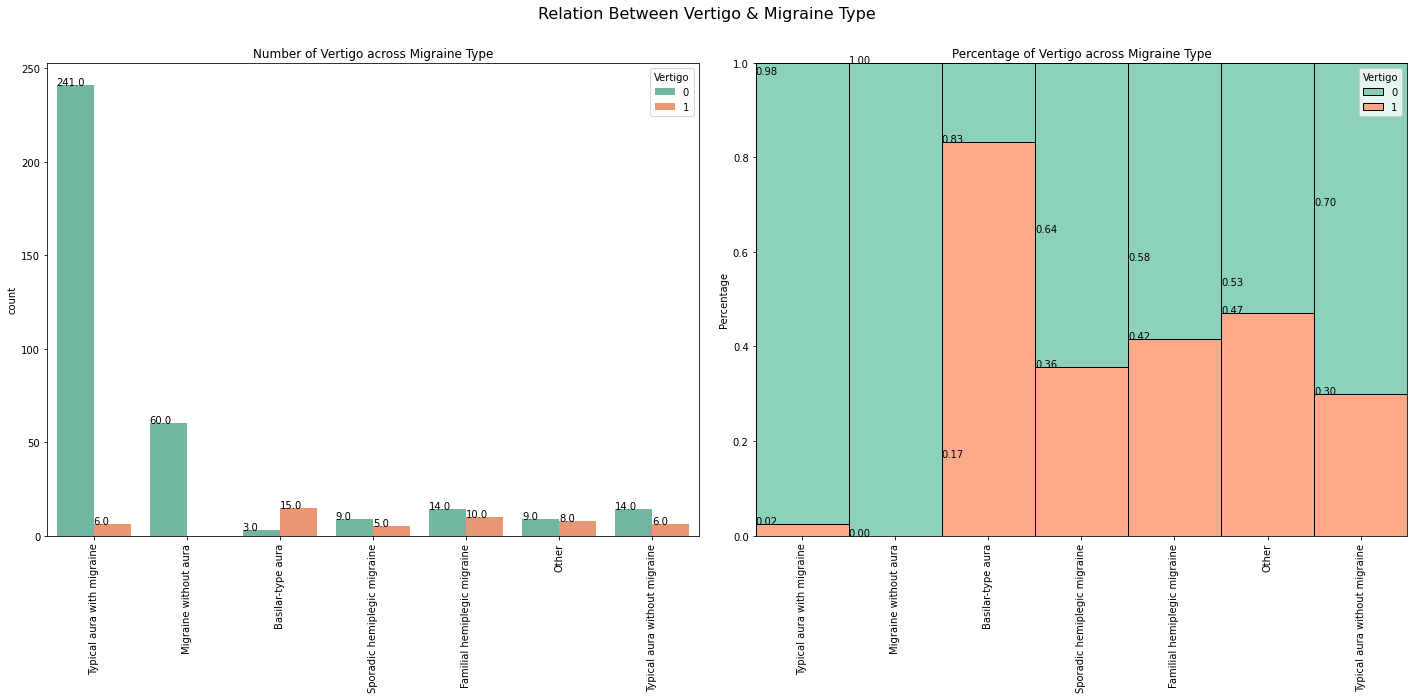

In [20]:
count_percentage_plot(df, 'Vertigo', 'Type', "Relation Between Vertigo & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Tinnitus And Type</strong>
    </h3>
    
</div>

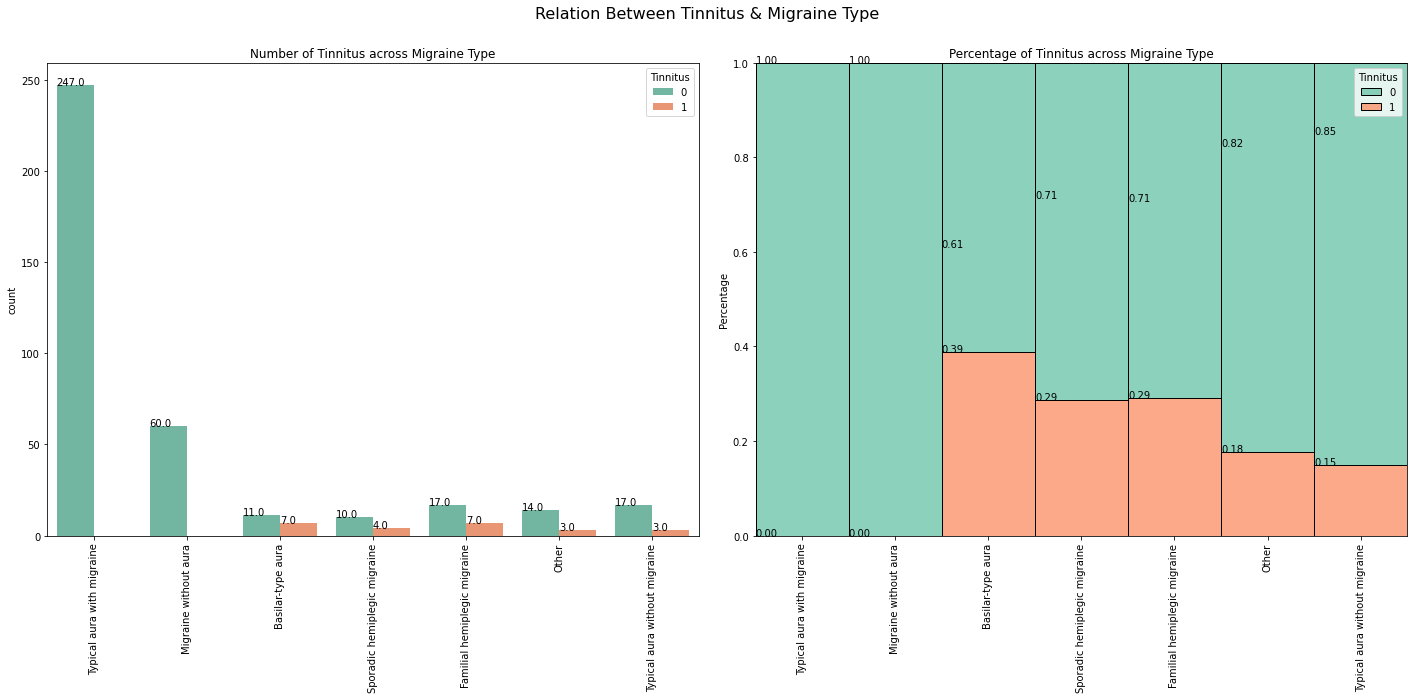

In [21]:
count_percentage_plot(df, 'Tinnitus', 'Type', "Relation Between Tinnitus & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Hypoacusis And Type</strong>
    </h3>
    
</div>

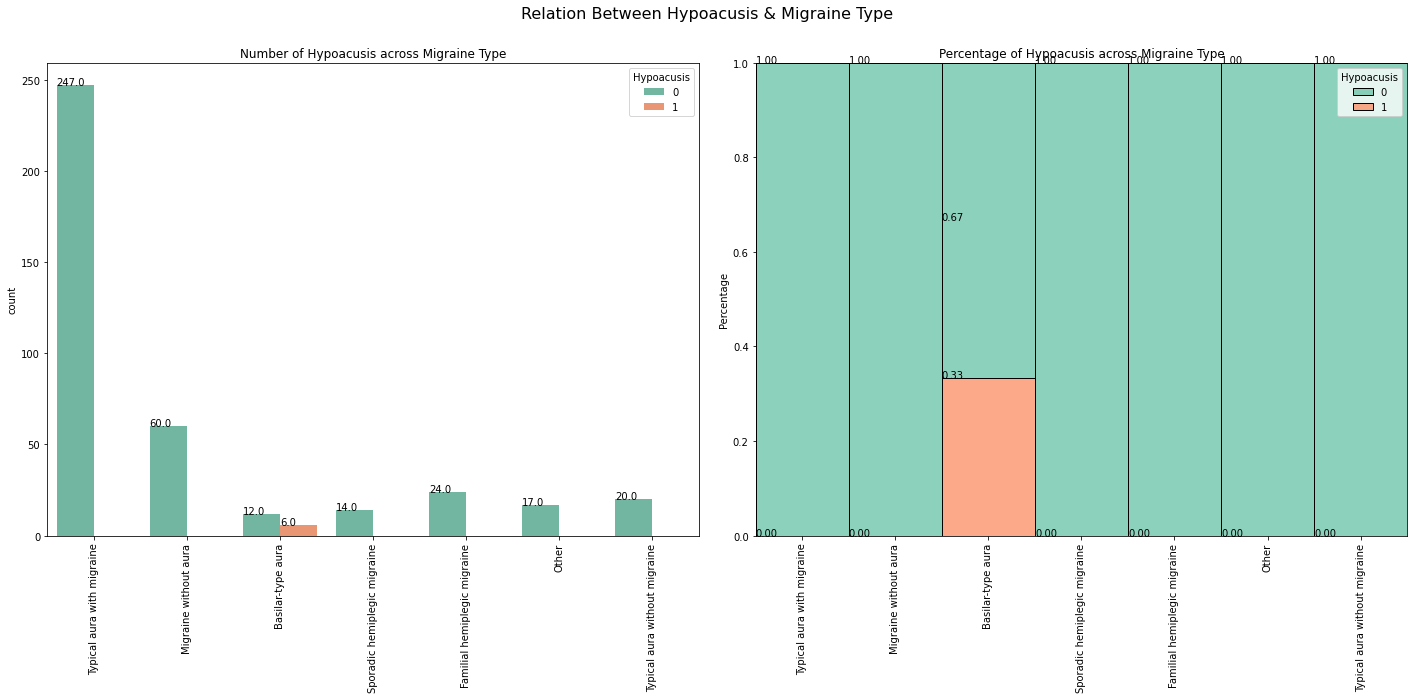

In [22]:
count_percentage_plot(df, 'Hypoacusis', 'Type', "Relation Between Hypoacusis & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Diplopia And Type</strong>
    </h3>
    
</div>

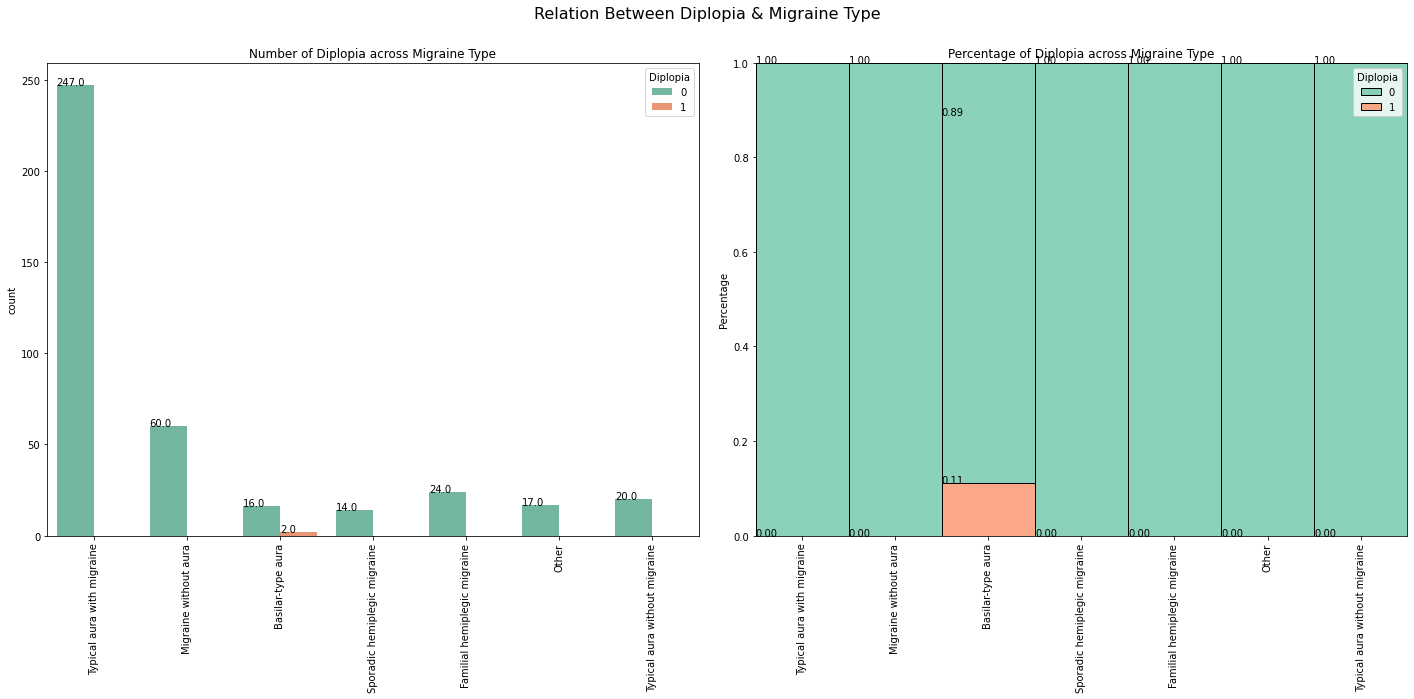

In [23]:
count_percentage_plot(df, 'Diplopia', 'Type', "Relation Between Diplopia & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Defect And Type</strong>
    </h3>
    
</div>

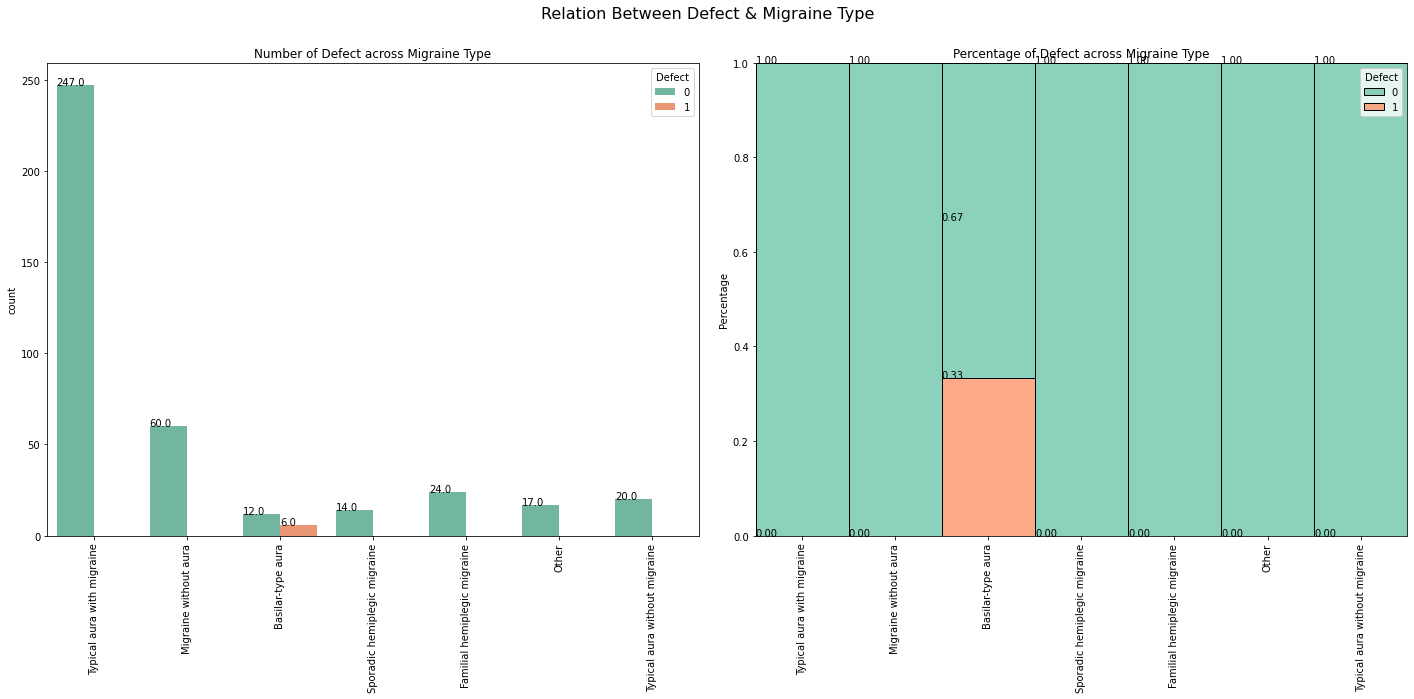

In [24]:
count_percentage_plot(df, 'Defect', 'Type', "Relation Between Defect & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Ataxia And Type</strong>
    </h3>
    
</div>

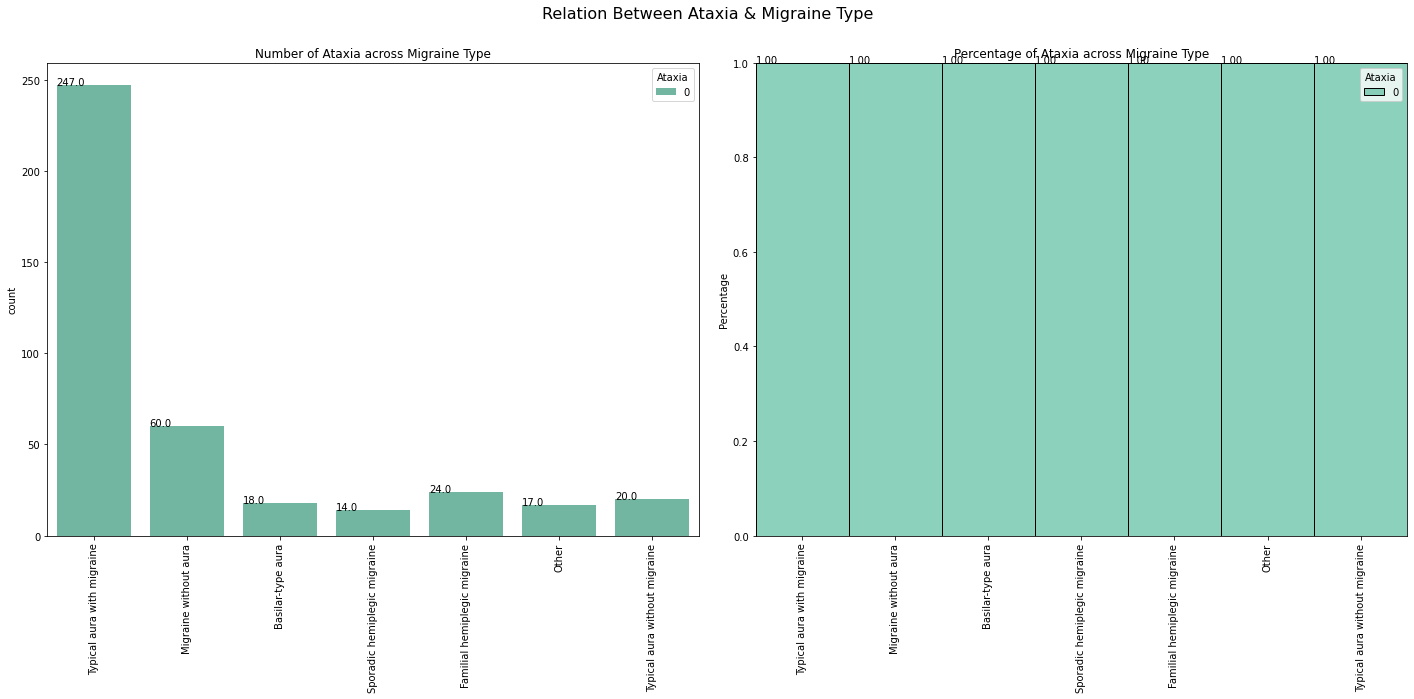

In [25]:
count_percentage_plot(df, 'Ataxia', 'Type', "Relation Between Ataxia & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Conscience And Type</strong>
    </h3>
    
</div>

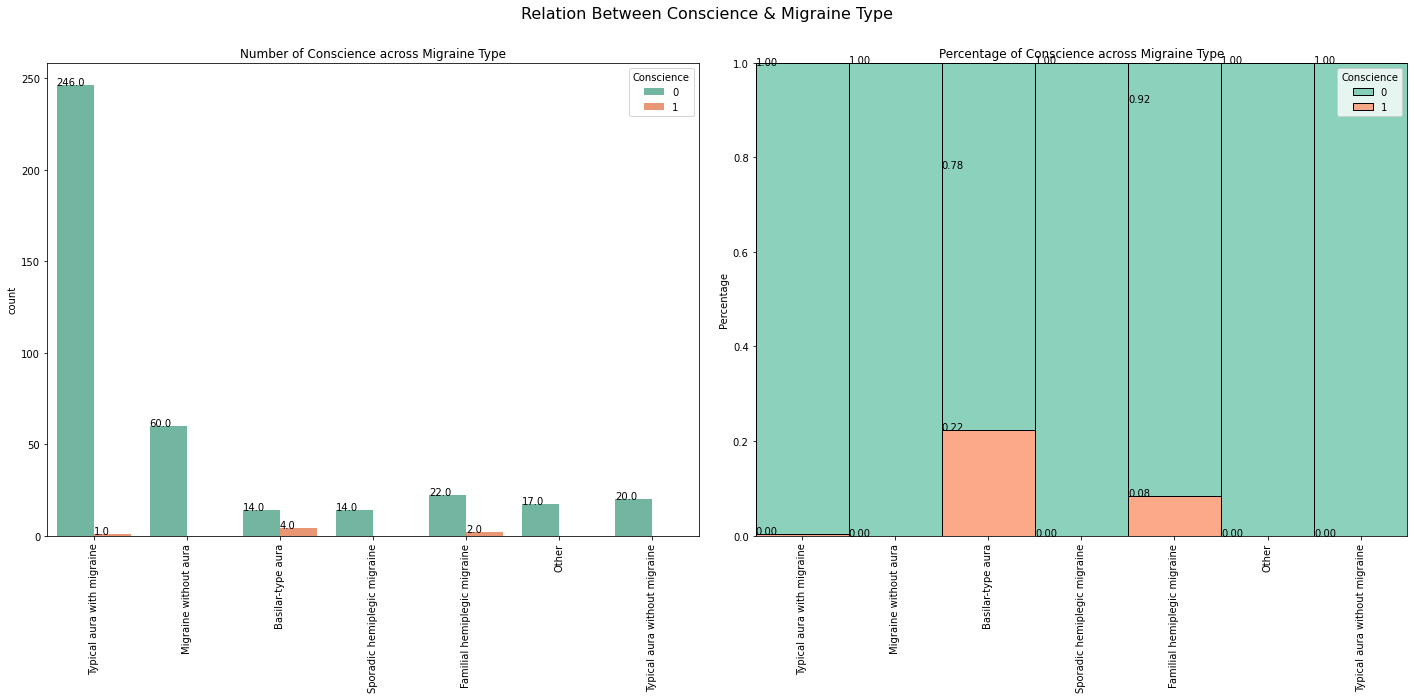

In [26]:
count_percentage_plot(df, 'Conscience', 'Type', "Relation Between Conscience & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>Paresthesia And Type</strong>
    </h3>
    
</div>

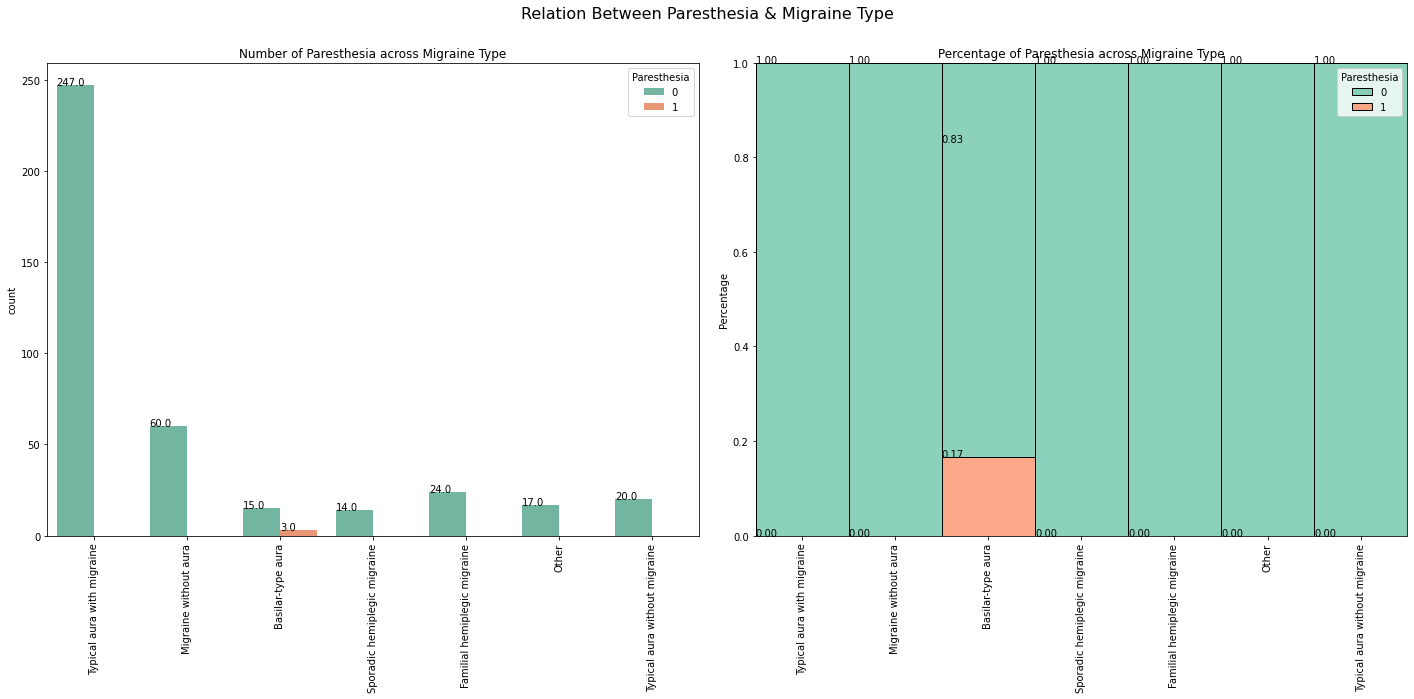

In [27]:
count_percentage_plot(df, 'Paresthesia', 'Type', "Relation Between Paresthesia & Migraine Type")

<div class='alert alert-info'>
    <h3>
    <strong>DPF And Type</strong>
    </h3>
    
</div>

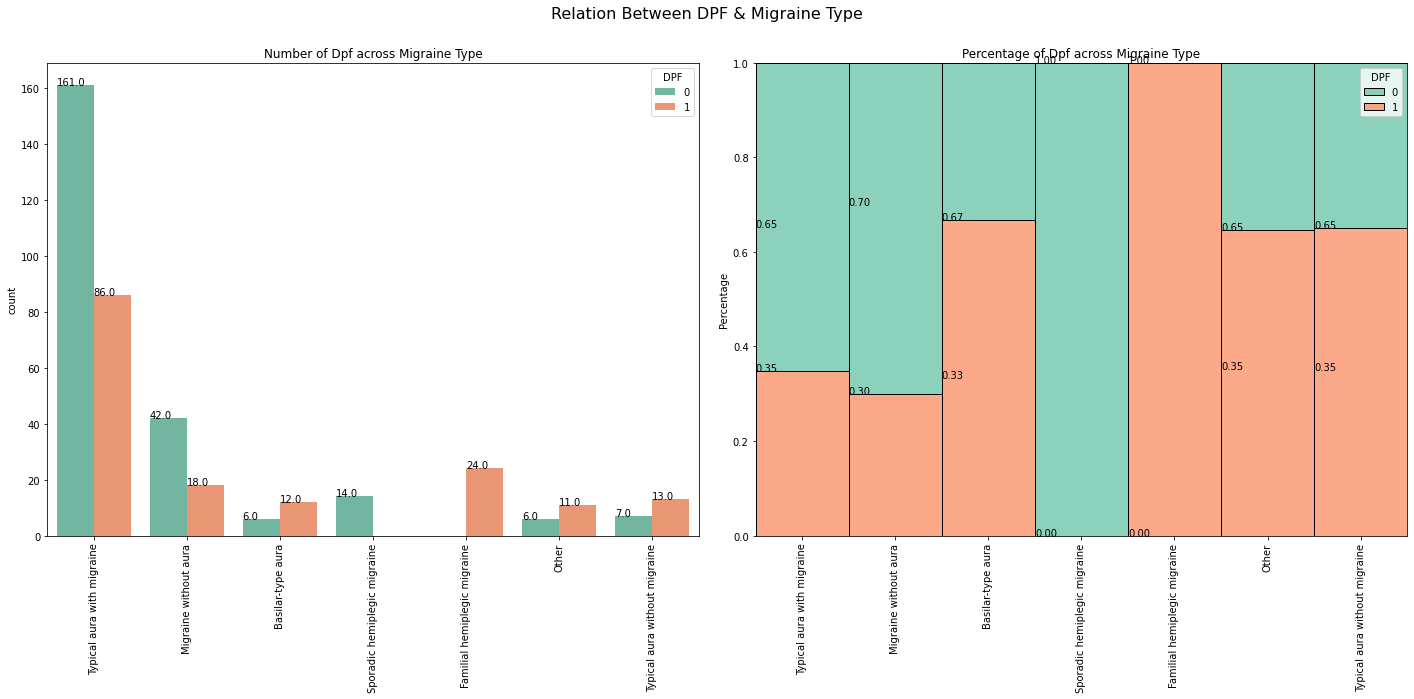

In [28]:
count_percentage_plot(df, 'DPF', 'Type', "Relation Between DPF & Migraine Type")

<a id='con_vs_target'></a>

<div class='alert alert-block alert-success'>
    <h3>
    <strong>Relation Between Continuous Variable and Target</strong>
    </h3>
    
</div>

<div class='alert alert-info'>
    <h3>
    <strong>Distribution Of Age</strong>
    </h3>
    
</div>

In [29]:
def dist_summary(df,col,title,color="purple"):
    fig,ax = plt.subplots(3,1, figsize=(15,8),sharex=True)
    # Histogram plot
    sns.histplot(df[col], kde=True, ax=ax[0], color=color)
    ax[0].set(xlabel=None)
    ax[0].set_title("KDE Plot")
    
    # Box Plot
    sns.boxplot(df[col], ax=ax[1], color=color)
    ax[1].set(xlabel=None)
    ax[1].set_title("Box Plot")
    
    # Violon Plot
    sns.violinplot(df[col],ax=ax[2], color=color)
    ax[2].set(xlabel=None)
    ax[2].set_title("Violin Plot")
    
    plt.suptitle(title, fontsize=18)
    plt.tight_layout(pad=3)
    plt.show()

In [30]:
def hist(df,col):
    plt.figure(figsize=(15,10))
    plt.title("Distribution Of Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    sns.histplot(df[col], color='purple')
    plt.show()

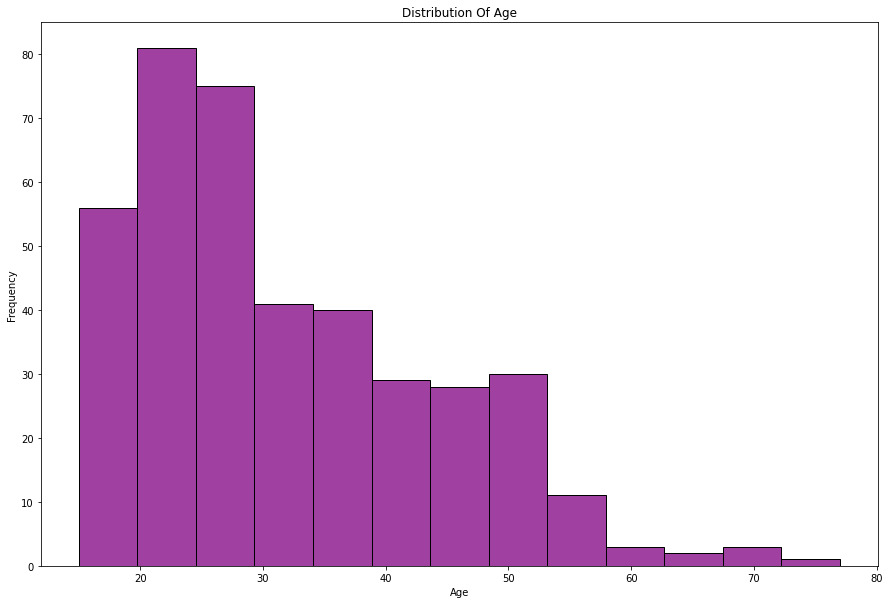

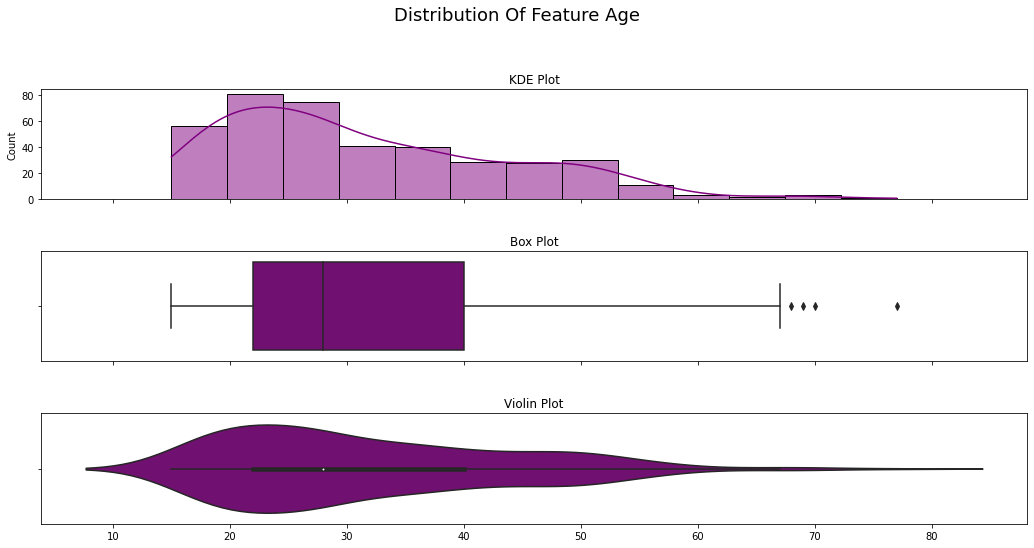

In [31]:
hist(df,"Age")
dist_summary(df,"Age", "Distribution Of Feature Age")

<div class='alert alert-info'>
    <h3>
    <strong>Relation between Migraine Type & Age</strong>
    </h3>
    
</div>

In [32]:
def cat_hist_plot(df,x,target):
    fig,ax = plt.subplots(4,4, figsize=(20,20))
    
    labels = [i for i in df[target].unique() for x in (0,1)]
    row,col = 0,0
    
    fig.delaxes(ax[3][2])
    fig.delaxes(ax[3][3])
    
    plt.suptitle("Distribution Of Age Across All Migraine Types", fontsize=20)
    
    for label in labels:
        if row == 4:
            break
            
        if col%2 == 0:
            ax[row,col].set_title(f"KDE OF AGE FOR {label.upper()}")
            sns.kdeplot(df[df[target]==label]['Age'],ax=ax[row,col], shade=True, color='purple')
            col+=1
            
        else:
            ax[row,col].set_title(f"BOXPLOT OF AGE FOR {label.upper()}")
            sns.boxplot(y=df[df[target]==label]['Age'],ax=ax[row,col], color='pink')
            if col == 3:
                col = 0
                row += 1
                continue
                
            col+=1
            
    
    plt.tight_layout(pad=4)
    plt.show()

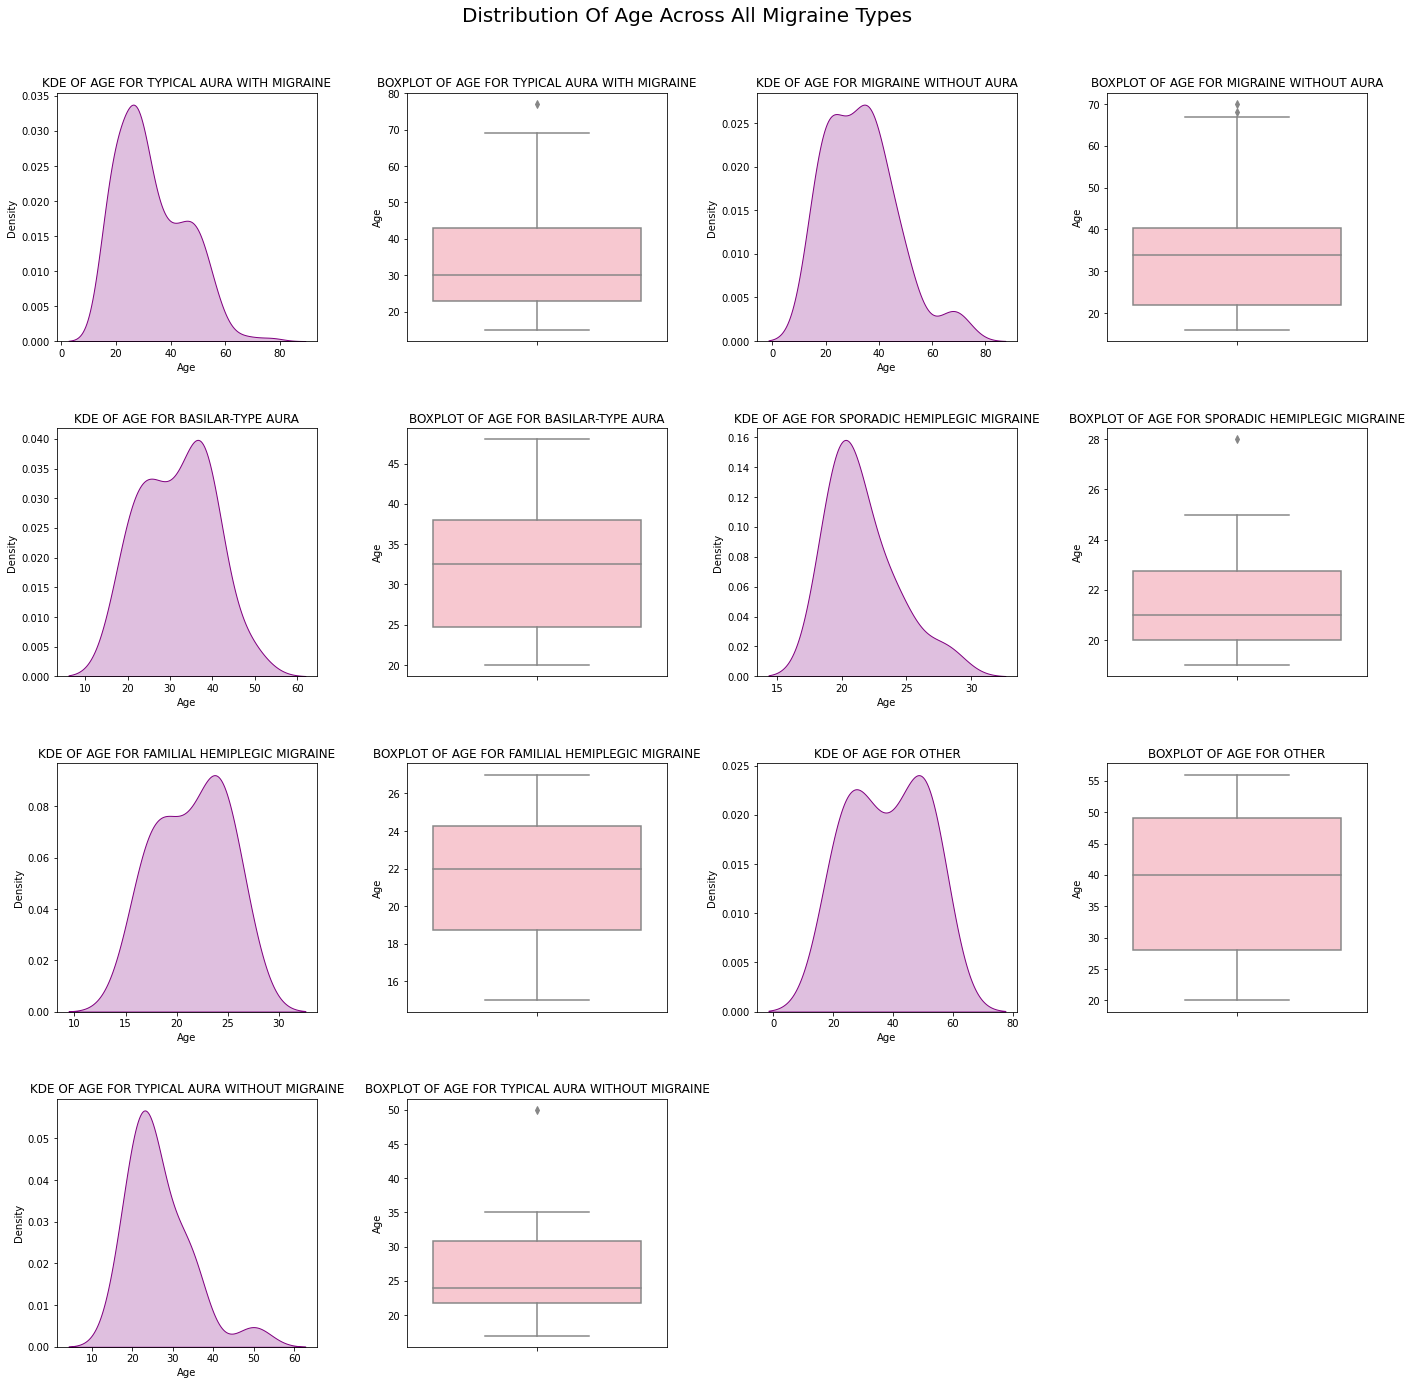

In [33]:
cat_hist_plot(df,x="Age",target="Type")

<a id='encode_target'></a>
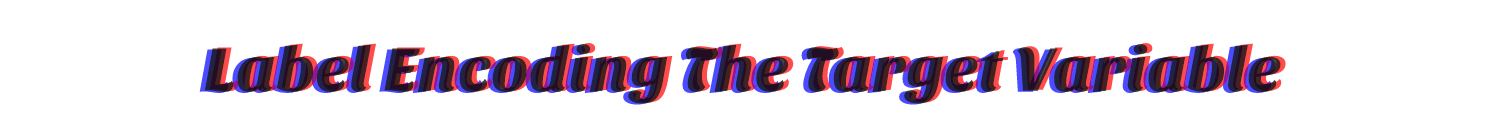

In [34]:
# Initilize LabelEncoder object
le = LabelEncoder()

# Fit transfrom the Type feature
df['Type'] = le.fit_transform(df["Type"])

# Print the head of data
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5


<a id='balance_imbalance'></a>
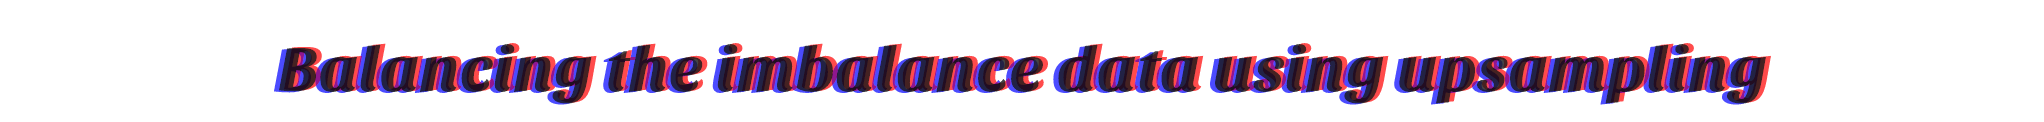

In [35]:
def cat_count_plot(df,col):
    # set figsize and plot
    plt.figure(figsize=(15,8))
    plt.title(f"Count of categories of column {col}")
    ax = sns.countplot(df[col], palette='Set2')
    ax.set_xlabel("Categories")
    ax.set_ylabel("Number of categories")
    # Annotate each bar
    for p in ax.patches:
        ax.annotate("{:.1f}".format(p.get_height()), (p.get_x(), p.get_height()))
    plt.show()

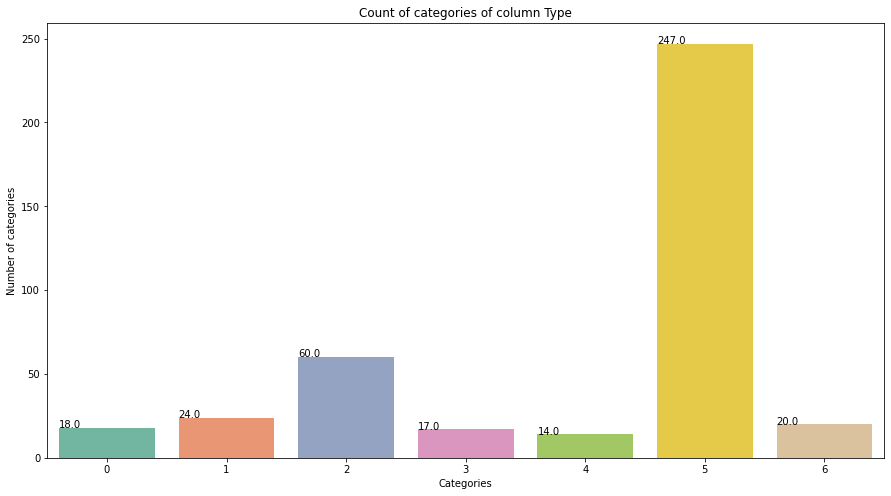

In [36]:
cat_count_plot(df,'Type')

In [37]:
# labels in majority
major_class5 = df[df['Type']==5]

# labels in minority
minor_class0 = df[df['Type']==0]
minor_class1 = df[df['Type']==1]
minor_class2 = df[df['Type']==2]
minor_class3 = df[df['Type']==3]
minor_class4 = df[df['Type']==4]
minor_class6 = df[df['Type']==6]

# Upsample the data
upsampled_minor_class0 =resample(minor_class0, n_samples=247)
upsampled_minor_class1 =resample(minor_class1, n_samples=247)
upsampled_minor_class2 =resample(minor_class2, n_samples=247)
upsampled_minor_class3 =resample(minor_class3, n_samples=247)
upsampled_minor_class4 =resample(minor_class4, n_samples=247)
upsampled_minor_class6 =resample(minor_class6, n_samples=247)

# Concatinate the upsampled with the major class
df_balanced = pd.concat([major_class5,
                         upsampled_minor_class0,
                         upsampled_minor_class1,
                         upsampled_minor_class2,
                         upsampled_minor_class3,
                         upsampled_minor_class4,
                         upsampled_minor_class6])

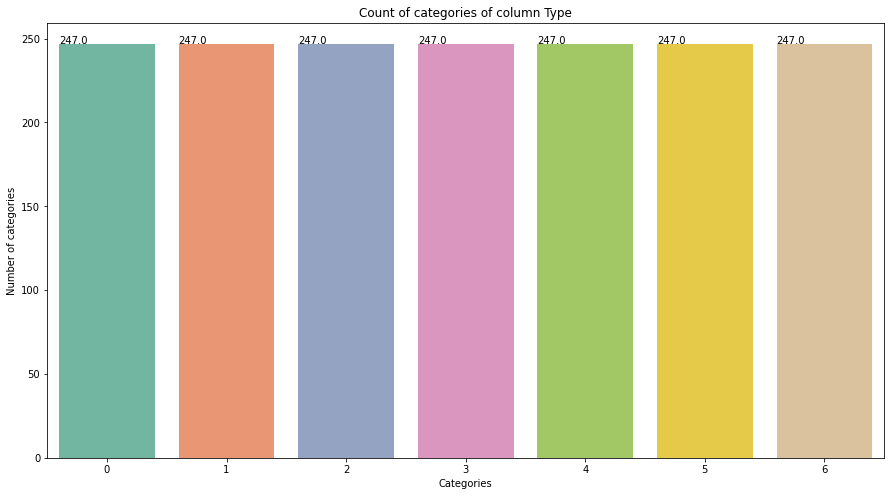

In [38]:
cat_count_plot(df_balanced,'Type')

<a id='tts'></a>
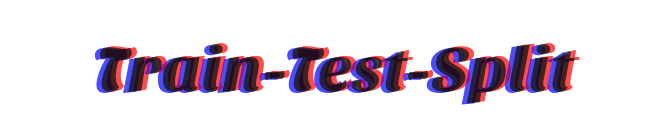

In [39]:
# Split data into features and target
X = df_balanced.drop(columns=['Type'])
Y = df_balanced['Type']

In [40]:
# Create a training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=11)

<a id='mc'></a>
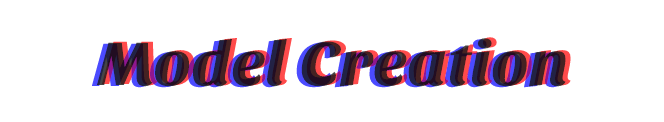

In [41]:
# Model initlialization
rfc = RandomForestClassifier()

<a id='hpo'></a>
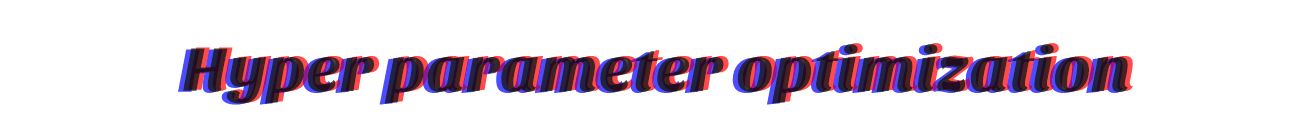

In [42]:
# A function to print model metrics
def model_metrics(model,X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test):
    # Make predictions on test data
    Y_pred = model.predict(X_test)
    
    # show fit of model of train and test set
    print("*"*5,"Model Fit","*"*5,"\n")
    print(f"FIT ON TRAIN DATA   --> {model.score(X_train,Y_train)}")
    print(f"FIT ON TEST DATA    --> {model.score(X_test,Y_test)}")
    
    # binarize multiclass output
    lb = LabelBinarizer()
    Y_bin = lb.fit_transform(Y_test)
    
    # print the classification report
    print("\n\n","*"*5,"Classification Report","*"*5,"\n")
    print(classification_report(Y_test,Y_pred))
    
    # plot confusion matrix (using binary output)
    print("\n\n","*"*5,"Confusion Matrix","*"*5)
    plt.figure(figsize=(15,8))
    sns.heatmap(confusion_matrix(Y_test, Y_pred),cbar=False, cmap='cool', annot=True, fmt='.2f')
    plt.show()

In [43]:
# Create a parameter distribution
params_distribution = {
    "n_estimators":[int(x) for x in np.linspace(10,100,10)],
    "max_depth":[int(x) for x in np.linspace(5,30,5)],
    'min_samples_split':[int(x) for x in np.linspace(10,100,10)],
    'max_features':['auto','sqrt']
}

In [44]:
# Initialize a random search cv object
rscv = RandomizedSearchCV(estimator=rfc,param_distributions=params_distribution,verbose=2,cv=5,random_state=11)

# Perform tuning
rscv.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_split=30, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=30, n_estimators=20; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=30, n_estimators=20; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=30, n_estimators=20; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=30, n_estimators=20; total time=   0.0s
[CV] END max_depth=23, max_features=sqrt, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END max_depth=23, max_features=sqrt, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END max_depth=23, max_features=sqrt, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END max_depth=23, max_features=sqrt, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END max_depth=23, max_features=sqr

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=11, verbose=2)

In [45]:
# Show best model parameters
rscv.best_estimator_

RandomForestClassifier(max_depth=23, max_features='sqrt', min_samples_split=10,
                       n_estimators=40)

<a id='mc_and_mt'></a>
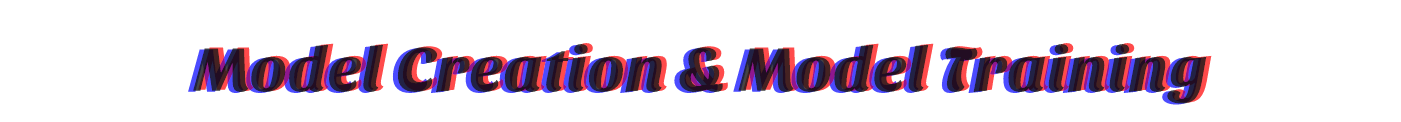

In [46]:
# Create a model
rfc = RandomForestClassifier(max_depth=23,
                             max_features='sqrt',
                             min_samples_split=10,
                             n_estimators=40)

# Fit the model
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=23, max_features='sqrt', min_samples_split=10,
                       n_estimators=40)

***** Model Fit ***** 

FIT ON TRAIN DATA   --> 0.996694214876033
FIT ON TEST DATA    --> 0.9826589595375722


 ***** Classification Report ***** 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       0.96      1.00      0.98        76
           2       0.94      1.00      0.97        76
           3       1.00      1.00      1.00        70
           4       0.99      1.00      0.99        83
           5       1.00      0.87      0.93        70
           6       1.00      1.00      1.00        64

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



 ***** Confusion Matrix *****


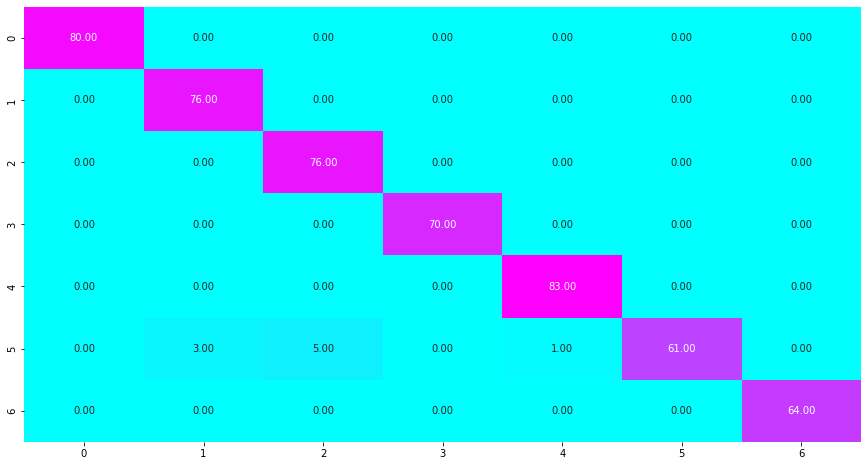

In [47]:
# Print metrics of the model
model_metrics(rfc)

<a id='mi'></a>
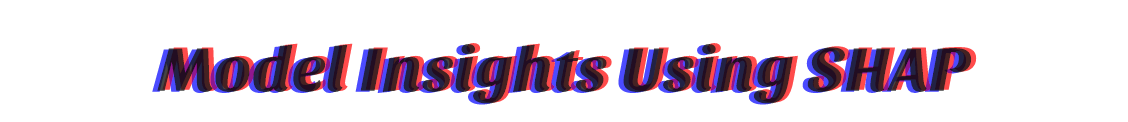

In [48]:
# Create a shap explainer
explainer = shap.TreeExplainer(rfc)

# Calculate shap values
shap_values = explainer.shap_values(X_test)

<a id='impact'></a>
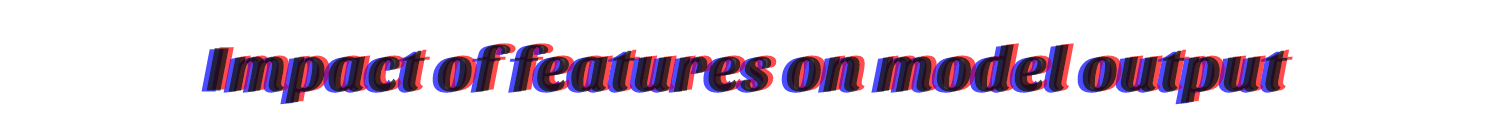

In [49]:
def shap_summary(label):
    plt.title(f"Output = {le.inverse_transform([label])[0]}")
    return shap.summary_plot(shap_values[label], X_test)

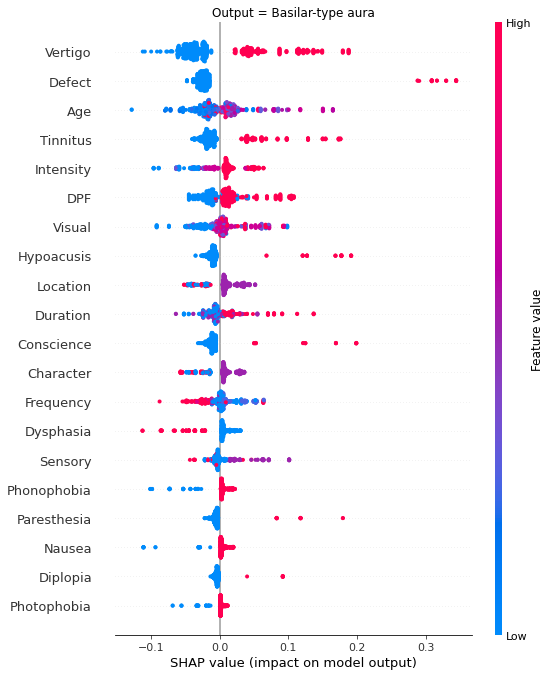

In [50]:
shap_summary(0)

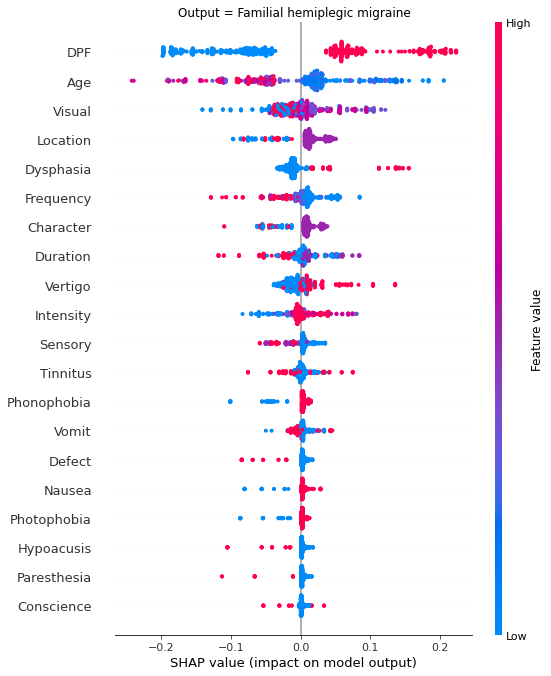

In [51]:
shap_summary(1)

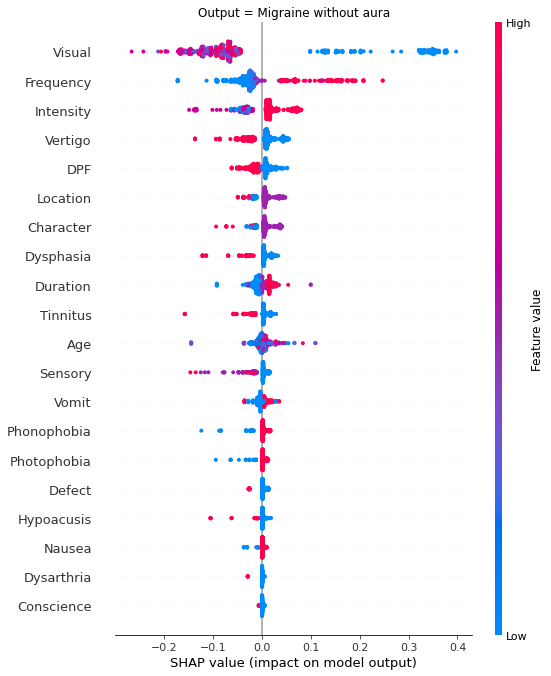

In [52]:
shap_summary(2)

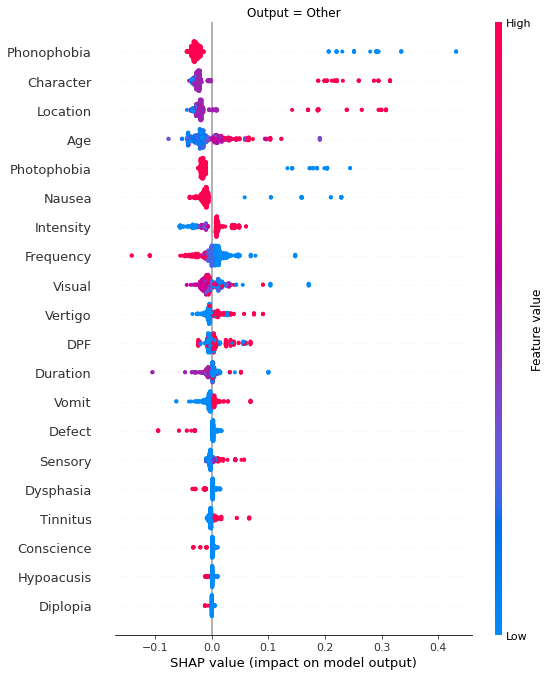

In [53]:
shap_summary(3)

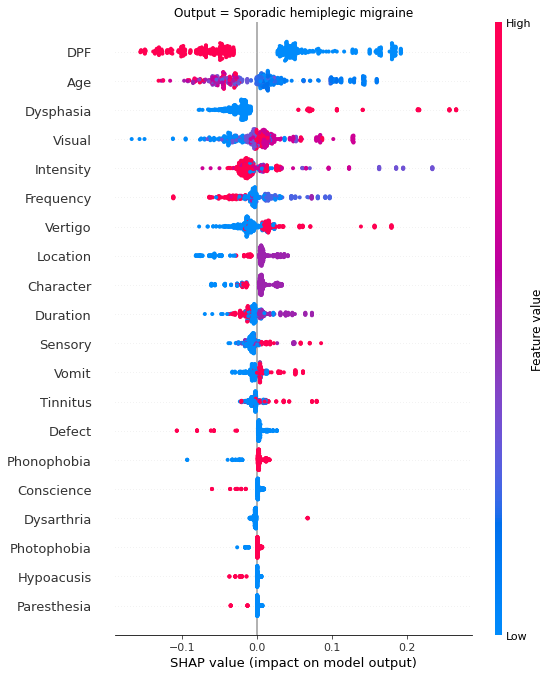

In [54]:
shap_summary(4)

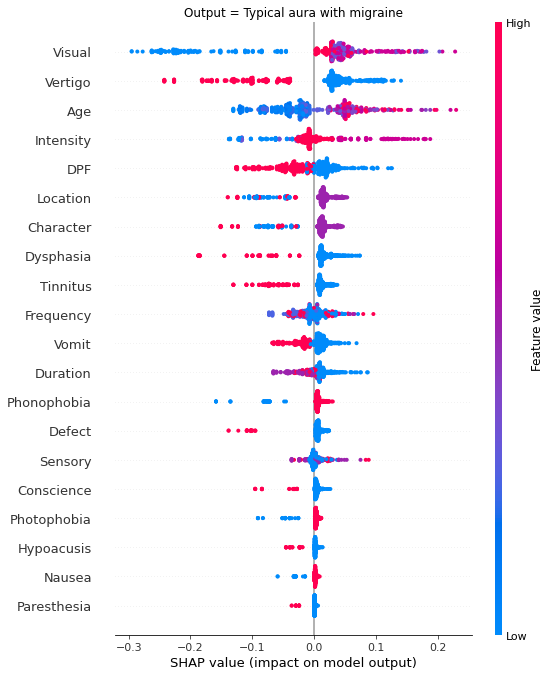

In [55]:
shap_summary(5)

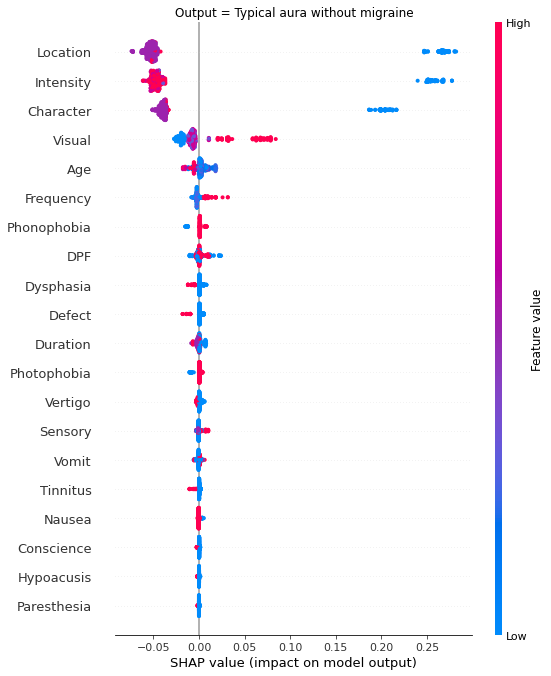

In [56]:
shap_summary(6)

<a id='avg_impact'></a>
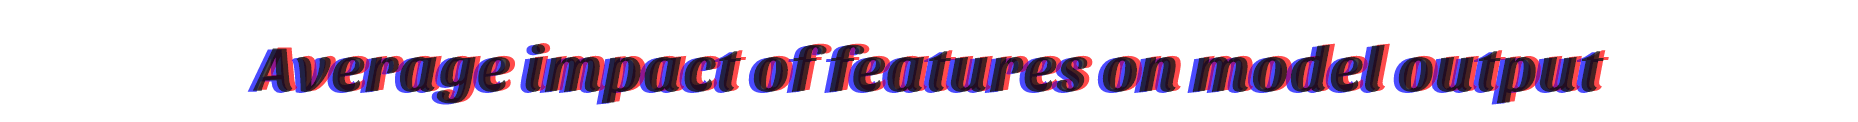

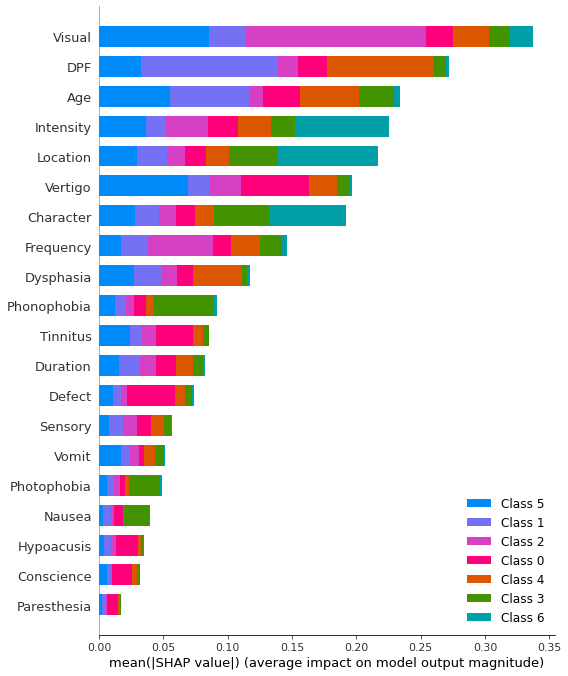

In [57]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            If you found this notebook📚 useful✨ and insightful💡, please give an upvote🔺🔺 and share your thoughts🧠 in the comment💬💬 section.
        </p>
    </div>
    </p>
</div>